# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
#Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Считаем датасет
#Чтобы данные не склеились в одну строку из-за разделителей в формате csv, вставим как разделитель знак табуляции '\t'
Flats = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
Flats.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
Flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Таблица состоит из 22 столбцов :

• airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
• balcony — число балконов • ceiling_height — высота потолков (м)  
• cityCenters_nearest — расстояние до центра города (м)  
• days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
• first_day_exposition — дата публикации  
• floor — этаж  
• floors_total — всего этажей в доме  
• is_apartment — апартаменты (булев тип)  
• kitchen_area — площадь кухни в квадратных метрах (м²)  
• last_price — цена на момент снятия с публикации  
• living_area — жилая площадь в квадратных метрах (м²)  
• locality_name — название населённого пункта  
• open_plan — свободная планировка (булев тип)  
• parks_around3000 — число парков в радиусе 3 км  
• parks_nearest — расстояние до ближайшего парка (м)  
• ponds_around3000 — число водоёмов в радиусе 3 км  
• ponds_nearest — расстояние до ближайшего водоёма (м)  
• rooms — число комнат  
• studio — квартира-студия (булев тип)  
• total_area — площадь квартиры в квадратных метрах (м²)  
• total_images — число фотографий квартиры в объявлении


### Вывод

Для корректного отбражения датасета необходимо указать разделитель.  
В таблице 22 столбца и 23699 строк. Наименования столбцов указывают на информацию о количественных и качественных характеристиках квартиры, ее местоположении.  
В таблице данные разных типов, имеются пропуски. Пропуски в высоте потолков, размерах жилой площади и кухни скорее всего говорят о том, что они стандартных размеров. Исходя из этого, указанные пропуски могут быть заполнены по среднему значению или медиане.  
Информацию о наличие балкона, водоемов, парка, возможно, не имеет аналитической ценности и она не была обязательна для заполнения (не заполнялась пользователями).   
Пропуски в количестве дней, в течение которых висело объявление до продажи квартир, вероятно, связаны с тем, что после реализации квартиры, соответствующие действия не фиксировались. Также возможно, что к моменту выгрузки информации, указанные квартиры не были проданы.

## Предобработка данных

1) Изучим пропуски

In [4]:
#Изучим пропуски
Flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В большинстве столбцов имеются пропуски. В частности, пропуски найдены в следующих столбцах (все переменные количественные):  
• ceiling_height — высота потолков (м)  
• floors_total — всего этажей в доме  
• living_area — жилая площадь в квадратных метрах (м²)  
• is_apartment — апартаменты (булев тип)  
• kitchen_area — площадь кухни в квадратных метрах (м²)  
• balcony — число балконов  
• locality_name — название населённого пункта  
• airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
• cityCenters_nearest — расстояние до центра города (м)  
• parks_around3000 — число парков в радиусе 3 км  
• parks_nearest — расстояние до ближайшего парка (м)  
• ponds_around3000 — число водоёмов в радиусе 3 км  
• ponds_nearest — расстояние до ближайшего водоёма (м)  
• days_exposition — сколько дней было размещено объявление (от публикации до снятия)  


In [5]:
# КОД РЕВЬЮЕРА

pd.DataFrame(Flats.isna().mean().round(4)*100).sort_values(by=0)[::-1].style.background_gradient('coolwarm')

,0
is_apartment,88.290000
parks_nearest,65.910000
ponds_nearest,61.560000
balcony,48.610000
ceiling_height,38.800000
airports_nearest,23.380000
cityCenters_nearest,23.290000
parks_around3000,23.280000
ponds_around3000,23.280000
days_exposition,13.420000


Рассмотрим в первую очередь интересующие для исследования столбцы. В столбцах площадь, цена и число комнат пропусков нет. Однако высота потолков часто пропущена.

Исследуем высоту потолков в квартирах

In [6]:
#Изучим высоту потолков в квартирах
Flats['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Исследуем линейную корреляцию высоты потолков с остальными параметрами

In [7]:
#Посмотрим линейную корреляцию высоты потолков с остальными параметрами
Flats.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,-0.029303,-0.024407,0.104756,0.121693,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,-0.025362,-0.008802,0.519869,0.029646,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.047937,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,-0.147286,-0.087500,0.269945,0.017991,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.001674,0.042777,0.087641,0.040523,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,0.070151,0.050791,0.163944,0.194065,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,-0.056231,-0.033711,0.428674,0.018849,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,0.036940,0.035824,0.135531,0.168773,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,1.000000,-0.004235,NaN,0.031455,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476
open_plan,-0.024407,-0.008802,-0.034885,-0.087500,0.042777,0.050791,-0.033711,0.035824,-0.004235,1.000000,NaN,0.019491,-0.013583,-0.004204,-0.010077,0.010612,0.008455,-0.003328,-0.024112


Как следует из анализа коэффицентов корреляции, высота потолков не зависит напрямую от размера квартиры, количества комнат и иных параметров, представленных в таблице.   
Вероятнее всего, высота потолков зависит от типа жилья, который можно было бы определить если бы, к примеру, была информация о годе постройки. Информация о годе постройки каждого из домов отсутствует, поэтому в указанном случае целесообразно рассчитать  среднее значение (или медиану, если будут выбросы) для самых разных населенных пунктов и по такому принципу заполним пропуски.  
Минимальное значение в 1 м и максимальное в 100м явно ошибочны. Скорее всего, если высота потолков в квартире "обычная", то респонденты этого не указывали. Среднее значение 2.78 метра похоже на наиболее вероятную величину потолков с точки зрения здравого смысла, так как средняя высота потолков от 2.4 метра в жилом фонде 60гг. постройки до 2.5-2.7 метров в современном жилье. При этом высота потолков в элитном жилье может оставлять больше 3 метров.

Создадим столбец, в котором будут медианы высот потолков по городам

In [8]:
#Создадим столбец, в котором будут медианы высот потолков по городам
Flats['ceiling_height_median'] = 0

Введем функцию, которая считает медианы высоты потолков по городам и выдает столбец с ними

In [9]:
def ceiling_heigh(row):
    row[22] = Flats.loc[Flats['locality_name'] == row[14], 'ceiling_height'].median()
    return row[22]

Заменим пропуски медианами

In [10]:
Flats.loc[Flats['ceiling_height'].isnull() == True, 'ceiling_height'] = Flats['ceiling_height_median']

Проверим заполнение пропусков

In [11]:
Flats['ceiling_height'].describe()

count    23699.000000
mean         1.696182
std          1.672495
min          0.000000
25%          0.000000
50%          2.500000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Часть пропусков не было заполнено по следующим причинам:  
- некоторые населенные пункты имеются только в единственном количестве;  
- все значения высоты потолков для конкретного города пропущены.  
Избавимся от оставшихся пропусков удалением строчек с ними. 

Избавляемся от строк с пропусками

In [12]:
Flats.drop(Flats[Flats['ceiling_height'].isnull() == True].index, inplace=True)

Так как массовое строительство, в основном, типовое, одинаковые дома обладают схожими характеристиками. Поэтому, заполнить пропуски в высоте потолков можно на основании числа этажей в доме.

Изучим размеры жилой площади

In [13]:
Flats['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Предположим, что размер жилой площади зависит от площади квартиры и количества комнат. Исследуем, какую часть общей площади квартиры занимает жилая площадь для квартир с разным количеством комнат.

Исследуем, сколько комнат в квартирах.

In [14]:
Flats['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

Большинство квартил имеют 0, 1, 2, 3, 4, 5, 6 или 7 комнаты. Рассчитаем в первую очередь для них, какую часть квартиры в среднем занимает жилая площадь. И далее домножим на полученный процент общую площадь тех квартир, в которых отсутствует информация о площади жилого помещения.

Рассчитаем медианы для разного количества комнат

In [15]:
print ((Flats.loc[(Flats['rooms'] == 0) & (Flats['living_area'].isnull() == False), 'living_area']/Flats.loc[(Flats['rooms'] == 0) & (Flats['living_area'].isnull() == False), 'total_area']).median())
print ((Flats.loc[(Flats['rooms'] == 1) & (Flats['living_area'].isnull() == False), 'living_area']/Flats.loc[(Flats['rooms'] == 1) & (Flats['living_area'].isnull() == False), 'total_area']).median())
print ((Flats.loc[(Flats['rooms'] == 2) & (Flats['living_area'].isnull() == False), 'living_area']/Flats.loc[(Flats['rooms'] == 2) & (Flats['living_area'].isnull() == False), 'total_area']).median())
print ((Flats.loc[(Flats['rooms'] == 3) & (Flats['living_area'].isnull() == False), 'living_area']/Flats.loc[(Flats['rooms'] == 3) & (Flats['living_area'].isnull() == False), 'total_area']).median())
print ((Flats.loc[(Flats['rooms'] == 4) & (Flats['living_area'].isnull() == False), 'living_area']/Flats.loc[(Flats['rooms'] == 4) & (Flats['living_area'].isnull() == False), 'total_area']).median())
print ((Flats.loc[(Flats['rooms'] == 5) & (Flats['living_area'].isnull() == False), 'living_area']/Flats.loc[(Flats['rooms'] == 5) & (Flats['living_area'].isnull() == False), 'total_area']).median())
print ((Flats.loc[(Flats['rooms'] == 6) & (Flats['living_area'].isnull() == False), 'living_area']/Flats.loc[(Flats['rooms'] == 6) & (Flats['living_area'].isnull() == False), 'total_area']).median())
print ((Flats.loc[(Flats['rooms'] == 7) & (Flats['living_area'].isnull() == False), 'living_area']/Flats.loc[(Flats['rooms'] == 7) & (Flats['living_area'].isnull() == False), 'total_area']).median())
print ((Flats.loc[(Flats['rooms'] == 9) & (Flats['living_area'].isnull() == False), 'living_area']/Flats.loc[(Flats['rooms'] == 9) & (Flats['living_area'].isnull() == False), 'total_area']).median())

0.689655172413793
0.48248798959576933
0.5850091407678245
0.6316666666666666
0.6597402597402597
0.6518423782149324
0.6794117647058824
0.6816702819956616
0.6282513005202081


Заполним пропуски

In [16]:
Flats.loc[(Flats['living_area'].isnull() == True) & (Flats['rooms'] == 0), 'living_area'] = Flats.loc[(Flats['living_area'].isnull() == True) & (Flats['rooms'] == 0), 'total_area'] * 0.69
Flats.loc[(Flats['living_area'].isnull() == True) & (Flats['rooms'] == 1), 'living_area'] = Flats.loc[(Flats['living_area'].isnull() == True) & (Flats['rooms'] == 1), 'total_area'] * 0.48
Flats.loc[(Flats['living_area'].isnull() == True) & (Flats['rooms'] == 2), 'living_area'] = Flats.loc[(Flats['living_area'].isnull() == True) & (Flats['rooms'] == 2), 'total_area'] * 0.585
Flats.loc[(Flats['living_area'].isnull() == True) & (Flats['rooms'] == 3), 'living_area'] = Flats.loc[(Flats['living_area'].isnull() == True) & (Flats['rooms'] == 3), 'total_area'] * 0.63
Flats.loc[(Flats['living_area'].isnull() == True) & (Flats['rooms'] == 4), 'living_area'] = Flats.loc[(Flats['living_area'].isnull() == True) & (Flats['rooms'] == 4), 'total_area'] * 0.66
Flats.loc[(Flats['living_area'].isnull() == True) & (Flats['rooms'] == 5), 'living_area'] = Flats.loc[(Flats['living_area'].isnull() == True) & (Flats['rooms'] == 5), 'total_area'] * 0.65
Flats.loc[(Flats['living_area'].isnull() == True) & (Flats['rooms'] == 6), 'living_area'] = Flats.loc[(Flats['living_area'].isnull() == True) & (Flats['rooms'] == 6), 'total_area'] * 0.68
Flats.loc[(Flats['living_area'].isnull() == True) & (Flats['rooms'] == 7), 'living_area'] = Flats.loc[(Flats['living_area'].isnull() == True) & (Flats['rooms'] == 7), 'total_area'] * 0.68
Flats.loc[(Flats['living_area'].isnull() == True) & (Flats['rooms'] == 9), 'living_area'] = Flats.loc[(Flats['living_area'].isnull() == True) & (Flats['rooms'] == 9), 'total_area'] * 0.63

Посмотрим, все ли пропуски были заполнены

In [17]:
Flats['living_area'].isna().mean()

0.0

Все пропуски в жилой площади заполнены. Далее рассмотрим пропуски в наименованиях населенных пунктов. Указанную отсутствующую информацию вряд ли получится восстановить, поэтому заполним значением 'no_info'.  

Исследуем наличие пропусков в названиях населенных пунктов.

In [18]:
Flats['locality_name'].isna().mean()

0.002067597788936242

Произведем замену

In [19]:
Flats['locality_name'] = Flats['locality_name'].fillna('no_info') 

Проверим замену

In [20]:
#Проверим замену
Flats['locality_name'].isna().mean()

0.0

Пропуски в населенном пункте были заполнены

Рассмотрим, где еще остались пропуски

In [21]:
Flats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   total_images           23699 non-null  int64  
 1   last_price             23699 non-null  float64
 2   total_area             23699 non-null  float64
 3   first_day_exposition   23699 non-null  object 
 4   rooms                  23699 non-null  int64  
 5   ceiling_height         23699 non-null  float64
 6   floors_total           23613 non-null  float64
 7   living_area            23699 non-null  float64
 8   floor                  23699 non-null  int64  
 9   is_apartment           2775 non-null   object 
 10  studio                 23699 non-null  bool   
 11  open_plan              23699 non-null  bool   
 12  kitchen_area           21421 non-null  float64
 13  balcony                12180 non-null  float64
 14  locality_name          23699 non-null  object 
 15  ai

Исследуем пропуски в площади кухни

In [22]:
Flats['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Исследуем линейную корреляцию площади кухни с остальными параметрами

In [23]:
Flats.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_median
total_images,1.000000,0.104473,0.115352,0.099288,0.081669,0.010427,0.100620,0.031340,-0.029303,-0.024407,0.104756,0.121693,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657,NaN
last_price,0.104473,1.000000,0.653675,0.363343,0.064270,-0.006984,0.586179,0.026576,-0.025362,-0.008802,0.519869,0.029646,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146,NaN
total_area,0.115352,0.653675,1.000000,0.758344,0.089583,-0.075774,0.946708,-0.024754,-0.072653,-0.034885,0.609121,0.047937,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675,NaN
rooms,0.099288,0.363343,0.758344,1.000000,0.088343,-0.228215,0.825941,-0.150862,-0.147286,-0.087500,0.269945,0.017991,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961,NaN
ceiling_height,0.081669,0.064270,0.089583,0.088343,1.000000,-0.089722,0.097435,-0.060695,-0.011842,-0.022297,0.042194,0.195941,-0.009125,-0.059577,0.068076,-0.051311,0.043021,-0.030031,0.051019,NaN
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.089722,1.000000,-0.159029,0.678059,0.070151,0.050791,0.163944,0.194065,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234,NaN
living_area,0.100620,0.586179,0.946708,0.825941,0.097435,-0.159029,1.000000,-0.088956,-0.054915,-0.022194,0.436520,0.018349,-0.051729,-0.227913,0.177479,-0.049357,0.148103,-0.084628,0.142649,NaN
floor,0.031340,0.026576,-0.024754,-0.150862,-0.060695,0.678059,-0.088956,1.000000,0.036940,0.035824,0.135531,0.168773,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463,NaN
studio,-0.029303,-0.025362,-0.072653,-0.147286,-0.011842,0.070151,-0.054915,0.036940,1.000000,-0.004235,NaN,0.031455,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476,NaN
open_plan,-0.024407,-0.008802,-0.034885,-0.087500,-0.022297,0.050791,-0.022194,0.035824,-0.004235,1.000000,NaN,0.019491,-0.013583,-0.004204,-0.010077,0.010612,0.008455,-0.003328,-0.024112,NaN


Площадь кухни лучше всего коррелирует с общей площадью квартиры (коэффициент корреляции 0.609), но для заполнения в зависимости от нее придется разбивать пощадь квартир на категории.

Исследуем общие площади квартир

In [24]:
Flats['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Исходя из группировок по площадям квартир (до 40 кв.м., от 40 до 52 кв.м., от 52 до 70 кв.м., от 70 до 150 кв.м.) рассчитаем и заполним отсутствующие площади кухни

In [25]:
Flats.loc[(Flats['kitchen_area'].isnull() == True) & (Flats['total_area'] <= 40), 'kitchen_area'] = Flats.loc[(Flats['kitchen_area'].isnull() == True) & (Flats['total_area'] <= 40), 'total_area'] * 0.24
Flats.loc[(Flats['kitchen_area'].isnull() == True) & (Flats['total_area'] >40) & (Flats['total_area'] <= 52), 'kitchen_area'] = Flats.loc[(Flats['kitchen_area'].isnull() == True) & (Flats['total_area'] >40) & (Flats['total_area'] <= 52),'total_area'] * 0.165
Flats.loc[(Flats['kitchen_area'].isnull() == True) & (Flats['total_area'] >52) & (Flats['total_area'] <= 70), 'kitchen_area'] = Flats.loc[(Flats['kitchen_area'].isnull() == True) & (Flats['total_area'] >52) & (Flats['total_area'] <= 70),'total_area'] * 0.15
Flats.loc[(Flats['kitchen_area'].isnull() == True) & (Flats['total_area'] >70) & (Flats['total_area'] <= 150), 'kitchen_area'] = Flats.loc[(Flats['kitchen_area'].isnull() == True) & (Flats['total_area'] >70) & (Flats['total_area'] <= 150),'total_area'] * 0.14
Flats.loc[(Flats['kitchen_area'].isnull() == True) & (Flats['total_area'] >150), 'kitchen_area'] = Flats.loc[(Flats['kitchen_area'].isnull() == True) & (Flats['total_area'] > 150), 'total_area'] * 0.11

Сделаем проверку

In [26]:
Flats['kitchen_area'].isna().mean()

0.0

Пропуски в площади кухни были заполнены. Пропуски в количестве дней, через которое объявление было снято, оставим как есть. Возможно, квартиры так и не были проданы. Все пропуски в количестве дней размещения были устранены.

2) Приведем данные к нужному типу

In [27]:
Flats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   total_images           23699 non-null  int64  
 1   last_price             23699 non-null  float64
 2   total_area             23699 non-null  float64
 3   first_day_exposition   23699 non-null  object 
 4   rooms                  23699 non-null  int64  
 5   ceiling_height         23699 non-null  float64
 6   floors_total           23613 non-null  float64
 7   living_area            23699 non-null  float64
 8   floor                  23699 non-null  int64  
 9   is_apartment           2775 non-null   object 
 10  studio                 23699 non-null  bool   
 11  open_plan              23699 non-null  bool   
 12  kitchen_area           23699 non-null  float64
 13  balcony                12180 non-null  float64
 14  locality_name          23699 non-null  object 
 15  ai

Поменяем тип данных в is_apartment на boolean

In [27]:
try:
    Flats['is_apartment'] = Flats['is_apartment'].astype('bool')  
except:
        print('Ошибка при переводe')

Поменяем тип данных в locality_name на string

In [28]:
try:
    Flats['locality_name'] = Flats['locality_name'].astype('str')  
except:
        print('Ошибка при переводe')

Поменяем тип данных в days_exposition на int

In [29]:
try:
    Flats['days_exposition'] = Flats['days_exposition'].astype('int')  
except:
        print('Ошибка при переводe')

Ошибка при переводe


Проверяем замены

In [30]:
# Проверяем замены
Flats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   total_images           23699 non-null  int64  
 1   last_price             23699 non-null  float64
 2   total_area             23699 non-null  float64
 3   first_day_exposition   23699 non-null  object 
 4   rooms                  23699 non-null  int64  
 5   ceiling_height         23699 non-null  float64
 6   floors_total           23613 non-null  float64
 7   living_area            23699 non-null  float64
 8   floor                  23699 non-null  int64  
 9   is_apartment           23699 non-null  bool   
 10  studio                 23699 non-null  bool   
 11  open_plan              23699 non-null  bool   
 12  kitchen_area           23699 non-null  float64
 13  balcony                12180 non-null  float64
 14  locality_name          23699 non-null  object 
 15  ai

Пропуски расстояния до центра города не получится чем-либо заменить. Также не удается заменить название населенного пункта. Иначе искать зависимость цены от расстояния до центра будет некорректно.

### Вывод

Были заменены пропуски в высоте потолков, количестве дней размещения объявления, площади кухни и жилой комнаты, названии населенного пункта. Был заменен тип object у количества дней размещений, названия населенного пункта и апартаментах для удобства дальнейшей работы

## Расчёты и добавление результатов в таблицу

Шаг 3. Посчитайте и добавьте в таблицу
1) Цен квадратного метра

Введем новый столбец, где цена квадратного метра будет равна стоимости квартиры деленной на площадь

In [31]:
Flats['price_for_meter'] = Flats['last_price']/Flats['total_area']
Flats.head(10)#Проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_median,price_for_meter
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.000,8,True,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0,120370.370370
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,0.00,11.0,18.600,1,True,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0,82920.792079
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,0.00,5.0,34.300,4,True,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0,92785.714286
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,0.00,14.0,100.170,9,True,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0,408176.100629
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.000,13,True,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0,100000.000000
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,0.00,12.0,14.400,5,True,...,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,0,95065.789474
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,0.00,26.0,10.600,6,True,...,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,0,99195.710456
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,0.00,24.0,41.886,22,True,...,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,0,110544.692737
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,0.00,27.0,15.430,26,True,...,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,0,87454.764777
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.600,7,True,...,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,0,88524.590164


2) Этаж квартиры; варианты — первый, последний, другой

Введем функцию, которая классифицирует этаж квартиры и применим ее к датасету с созданием нового столбца

In [32]:
def floor_category(row):
    if row[8] == 1:
        return 'первый'
    elif row[8] == row[6]:
        return 'последний'
    else:
        return 'другой'
Flats['floor_category'] = Flats.apply(floor_category, axis = 1)#Применяем функцию к датасету с созданием нового столбца
Flats.head(10)#Проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_median,price_for_meter,floor_category
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.000,8,True,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0,120370.370370,другой
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,0.00,11.0,18.600,1,True,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0,82920.792079,первый
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,0.00,5.0,34.300,4,True,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0,92785.714286,другой
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,0.00,14.0,100.170,9,True,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0,408176.100629,другой
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.000,13,True,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0,100000.000000,другой
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,0.00,12.0,14.400,5,True,...,NaN,NaN,NaN,NaN,NaN,NaN,55.0,0,95065.789474,другой
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,0.00,26.0,10.600,6,True,...,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,0,99195.710456,другой
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,0.00,24.0,41.886,22,True,...,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,0,110544.692737,другой
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,0.00,27.0,15.430,26,True,...,NaN,NaN,NaN,NaN,NaN,NaN,189.0,0,87454.764777,другой
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.600,7,True,...,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,0,88524.590164,другой


3) Cоотношение жилой к общей площади, а также отношение площади кухни к общей

Введем новыые столбцы с отношением площали кухни или жилого помещения к общей площади квартиры

In [33]:
Flats['living_to_total_area'] = Flats['living_area']/Flats['total_area']
Flats['kitchen_to_total_area'] = Flats['kitchen_area']/Flats['total_area']
Flats.head(10)#Проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_median,price_for_meter,floor_category,living_to_total_area,kitchen_to_total_area
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.000,8,True,...,1.0,482.0,2.0,755.0,NaN,0,120370.370370,другой,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,0.00,11.0,18.600,1,True,...,0.0,NaN,0.0,NaN,81.0,0,82920.792079,первый,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,0.00,5.0,34.300,4,True,...,1.0,90.0,2.0,574.0,558.0,0,92785.714286,другой,0.612500,0.148214
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,0.00,14.0,100.170,9,True,...,2.0,84.0,3.0,234.0,424.0,0,408176.100629,другой,0.630000,0.110000
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.000,13,True,...,2.0,112.0,1.0,48.0,121.0,0,100000.000000,другой,0.320000,0.410000
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,0.00,12.0,14.400,5,True,...,NaN,NaN,NaN,NaN,55.0,0,95065.789474,другой,0.473684,0.299342
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,0.00,26.0,10.600,6,True,...,0.0,NaN,0.0,NaN,155.0,0,99195.710456,другой,0.284182,0.386059
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,0.00,24.0,41.886,22,True,...,0.0,NaN,0.0,NaN,NaN,0,110544.692737,другой,0.585000,0.263966
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,0.00,27.0,15.430,26,True,...,NaN,NaN,NaN,NaN,189.0,0,87454.764777,другой,0.465320,0.265682
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.600,7,True,...,0.0,NaN,0.0,NaN,289.0,0,88524.590164,другой,0.714754,0.106557


4) день недели, месяц и год публикации объявления

Исследуем на формат даты

In [34]:
Flats['first_day_exposition']

0        2019-03-07T00:00:00
1        2018-12-04T00:00:00
2        2015-08-20T00:00:00
3        2015-07-24T00:00:00
4        2018-06-19T00:00:00
                ...         
23694    2017-03-21T00:00:00
23695    2018-01-15T00:00:00
23696    2018-02-11T00:00:00
23697    2017-03-28T00:00:00
23698    2017-07-21T00:00:00
Name: first_day_exposition, Length: 23699, dtype: object

Приведем к нужному формату даты

In [35]:
Flats['first_day_exposition'] = pd.to_datetime(Flats['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
Flats['first_day_exposition']# Проверка

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

С помощью стандартной функции найдем дни недели публикации

In [36]:
Flats['weekday'] = Flats['first_day_exposition'].dt.weekday
Flats['weekday'].value_counts()# Проверка

3    4295
1    4183
4    4000
2    3974
0    3612
5    1936
6    1699
Name: weekday, dtype: int64

С помощью стандартной функции находим месяц публикации

In [37]:
Flats['month'] = Flats['first_day_exposition'].dt.month
Flats['month'].value_counts()# Проверка

2     2640
3     2587
4     2379
11    2371
10    2127
9     1981
6     1760
8     1744
7     1695
12    1641
1     1500
5     1274
Name: month, dtype: int64

С помощью стандартной функции находим год публикации

In [38]:
Flats['year'] = Flats['first_day_exposition'].dt.year
Flats['year'].value_counts()# Проверка

2018    8519
2017    8190
2019    2879
2016    2783
2015    1191
2014     137
Name: year, dtype: int64

### Вывод

В датасет были добавлены новые столбцы с ценой квадратного метра, категоризацией этажа квартиры, днем недели, месяцем, годом публикаци объявления и соотношением жилой площади и кухни к общей площади квартиры

## Исследовательский анализ данных

1) В соответствии с условями задачи изучим следующие параметры: площадь, цена, число комнат, высота потолков. 

In [39]:
Flats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           23699 non-null  int64         
 1   last_price             23699 non-null  float64       
 2   total_area             23699 non-null  float64       
 3   first_day_exposition   23699 non-null  datetime64[ns]
 4   rooms                  23699 non-null  int64         
 5   ceiling_height         23699 non-null  float64       
 6   floors_total           23613 non-null  float64       
 7   living_area            23699 non-null  float64       
 8   floor                  23699 non-null  int64         
 9   is_apartment           23699 non-null  bool          
 10  studio                 23699 non-null  bool          
 11  open_plan              23699 non-null  bool          
 12  kitchen_area           23699 non-null  float64       
 13  b

Построим гистограмму для каждого параметра. Для этого введем цикл для автоматического построения гистограмм за вычетом выбросов

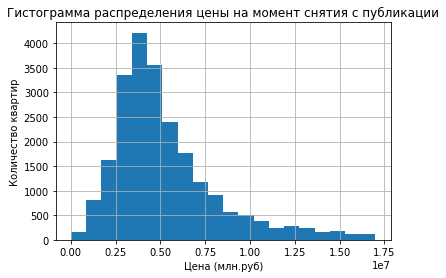

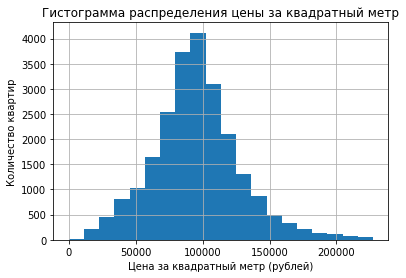

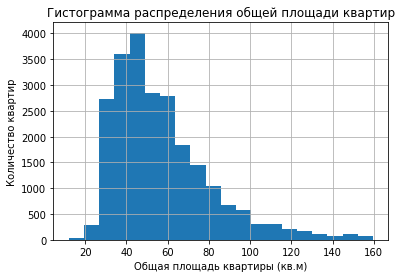

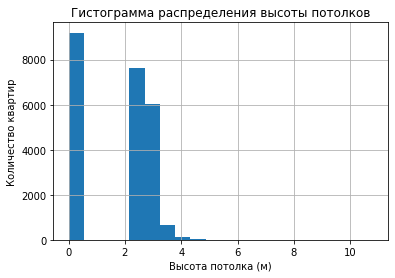

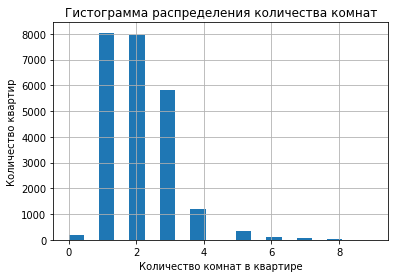

In [40]:
data_flat_chek = Flats.loc[:, ['last_price', 'price_for_meter', 'total_area', 'ceiling_height', 'rooms']]

for column in data_flat_chek:
   
    qr =Flats[column].quantile(.75) - Flats[column].quantile(.25) #рассчет межквартильного размаха
    mini = Flats[column].min() # рассчет нижнего диапазона
    qmin = Flats[column].quantile(.25) - qr * 3
    if qmin < mini:
        qmin = mini
    else:
        qmin = qmin
   
    maxi = Flats[column].max() # рассчет верхнего диапазона
    qmax = Flats[column].quantile(.75) + qr * 3
    if qmax > maxi:
        qmax = maxi
    else:
        qmax = qmax
   
    if column == 'last_price':
        hist_name = 'Гистограмма распределения цены на момент снятия с публикации'
        x_axis_name = 'Цена (млн.руб)'
        y_axis_name = 'Количество квартир'
    elif column == 'price_for_meter':
        hist_name = 'Гистограмма распределения цены за квадратный метр'   
        x_axis_name = 'Цена за квадратный метр (рублей)'
        y_axis_name = 'Количество квартир'
    elif column == 'total_area':    
        hist_name = 'Гистограмма распределения общей площади квартир'   
        x_axis_name = 'Общая площадь квартиры (кв.м)'
        y_axis_name = 'Количество квартир'
    elif column == 'ceiling_height':
        hist_name = 'Гистограмма распределения высоты потолков'   
        x_axis_name = 'Высота потолка (м)'
        y_axis_name = 'Количество квартир'
    elif column == 'rooms':    
        hist_name = 'Гистограмма распределения количества комнат'   
        x_axis_name = 'Количество комнат в квартире'
        y_axis_name = 'Количество квартир'   
        
        
    data_flat_chek.hist(column, bins = 20, range = ((qmin), (qmax))) #строит гистограммы в нужном диапазоне
    plt.title(hist_name) # заголовок гистограммы
    plt.ylabel(y_axis_name) # y-метка
    plt.xlabel(x_axis_name) # x-метка
    

Гистограмма стоимости квадратного метра похожа на нормалное распределение с пиком на 100 тыс.руб. за квадратный метр.   
Гистограмма стоимости квартиры скошена и имеет пик в районе 3 млн. При этом имеются и подозрительно маленькие и большие значения стоимости.     
Наиболее частые размеры квартир около 45 кв. метров. После 125 кв. метров имеется хвост. Но имеются и квартиры меньше 20 кв. метров.   
Высота потолков имеет пик в районе 2.7 метров. Наиболее часто встречающаяся высота потолков 2.5-3.1 метра.    
Чаще всего встречаются однокомнатные квартиры, немного реже 2-х комнатные, еще реже 3-х комнатные.   

2) В соответствии с условиями задачи изучим время продажи квартиры. Построим  гистограмму. Посчитаем среднее и медиану, а также сколько обычно занимает продажа. Сделаем вывод о "необычно долгих" и "быстрых" продажах.

Найдем среднее и медиану.

In [41]:
Flats['days_exposition'].describe()
Flats['days_exposition'].median()

95.0

Разница медианы и среднего значения подтверждает наличие выбросов

Построим гистограмму по времени продажи квартиры

Text(0.5, 0, 'Срок продажи квартир (дней)')

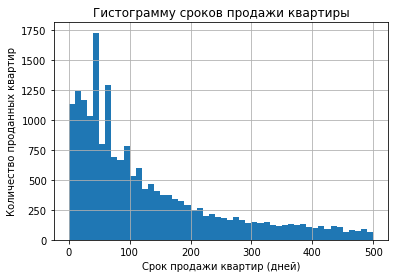

In [42]:
Flats['days_exposition'].hist(bins=50, range = (0, 500))
plt.title('Гистограмму сроков продажи квартиры') # заголовок гистограммы
plt.ylabel('Количество проданных квартир') # y-метка
plt.xlabel('Срок продажи квартир (дней)') # x-метка

Имеется большой пик от 0 до 25 дней. Это связано с наличием непроданных квартир. Самый большой пик около 40 дней. Поэтому примем минимальный срок продажи квартры - 2 недели, а максимальный- 1 год. В дальнейшем избавимся от неликвидных значений.

3) В соответствии с условиями задачи уберем редкие и выбивающиеся значения. Сделаем вывод об обнаруженных особенностях.

Все гистограммы имеют хвосты. Гистограмма цены за квадратный метр имеет вид нормального распределения. Гистограмма дней до продажи квартиры больше похожа на Пуассоновское распределение. Избавимся от выбросов исходя из гистограмма и прочих данных

In [43]:
# Функция для подсчёта границ с учетом 1.5 размаха
def quartile_range(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
    return dfq
# Столбцы с выбросами
list_features = ['last_price', 'total_area', 'kitchen_area', 'living_area', 'days_exposition', 'ceiling_height', 'rooms']
for col in list_features:
    Flats[col] = quartile_range(Flats, col)
# Возвращаем в целочисленный тип число комнат
Flats['rooms'] = Flats['rooms'].fillna(0).astype(int)
# Изучаем, есть ли выбивающиеся значения
data_flat_query = Flats
data_flat_query.describe()
#Flats.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_median,price_for_meter,living_to_total_area,kitchen_to_total_area,weekday,month,year
count,23699.000000,2.163800e+04,22459.000000,23699.000000,23670.000000,23613.000000,22813.000000,23699.000000,22328.000000,12180.000000,...,18181.000000,9110.000000,18849.000000,23699.0,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000
mean,9.858475,4.839970e+06,54.364907,2.013545,1.667348,10.673824,31.567720,5.892358,9.379918,1.150082,...,0.770255,517.980900,128.753886,0.0,9.942166e+04,0.564815,0.186925,2.569307,6.400101,2017.367146
std,5.682529,2.217341e+06,19.385325,0.986846,1.346777,6.597173,13.988617,4.885249,3.007505,1.071300,...,0.938346,277.720643,121.531193,0.0,5.030680e+04,0.102780,0.070733,1.789082,3.491561,1.039771
min,0.000000,1.219000e+04,12.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.000000,13.000000,1.000000,0.0,1.118349e+02,0.021583,0.025381,0.000000,1.000000,2014.000000
25%,6.000000,3.300000e+06,39.400000,1.000000,0.000000,5.000000,18.500000,2.000000,7.000000,0.000000,...,0.000000,294.000000,41.000000,0.0,7.658547e+04,0.491415,0.136364,1.000000,3.000000,2017.000000
50%,9.000000,4.400000e+06,50.100000,2.000000,2.500000,9.000000,30.000000,4.000000,9.000000,1.000000,...,1.000000,502.000000,85.000000,0.0,9.500000e+04,0.571429,0.169492,3.000000,6.000000,2017.000000
75%,14.000000,6.000000e+06,65.600000,3.000000,2.700000,16.000000,40.950000,8.000000,11.000000,2.000000,...,1.000000,729.000000,183.000000,0.0,1.142563e+05,0.633484,0.235294,4.000000,10.000000,2018.000000
max,50.000000,1.189440e+07,114.600000,5.000000,6.000000,60.000000,77.800000,33.000000,18.900000,5.000000,...,3.000000,1344.000000,512.000000,0.0,1.907500e+06,1.000000,0.787879,6.000000,12.000000,2019.000000


In [44]:
# Проверка по КОДу РЕВЬЮЕРА
data_flat_query[['last_price', 'total_area','rooms', 'ceiling_height', 'days_exposition','living_area', 'kitchen_area']].describe().loc[['min', 'max', 'count']]

,last_price,total_area,rooms,ceiling_height,days_exposition,living_area,kitchen_area
min,12190.0,12.0,0.0,0.0,1.0,2.0,1.3
max,11894400.0,114.6,5.0,6.0,512.0,77.8,18.9
count,21638.0,22459.0,23699.0,23670.0,18849.0,22813.0,22328.0


В датафрейме отброшены значения на основе 1.5 размаха. Значения стали лучше и адекватнее, при этом количество записей уменьшилось не существенно.

Построим гистограммы и посмотрим на результат

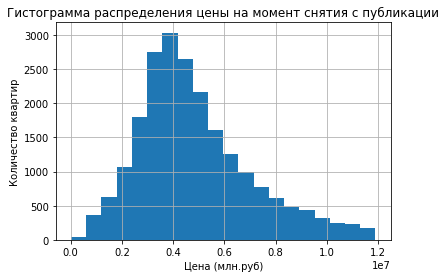

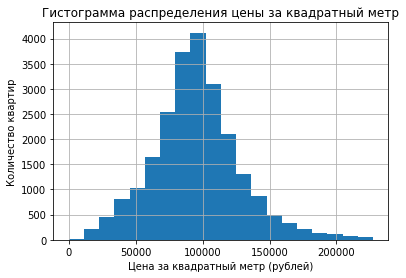

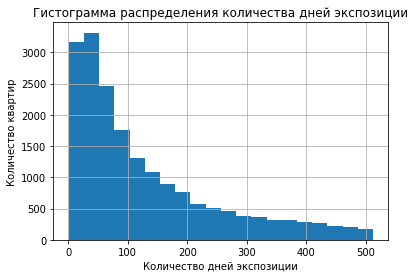

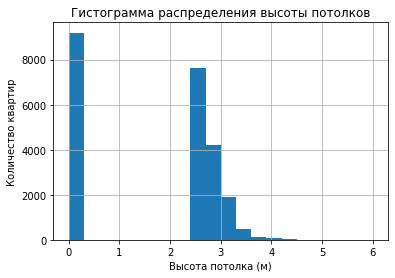

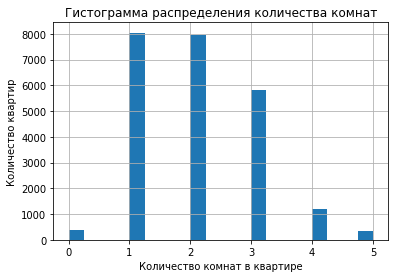

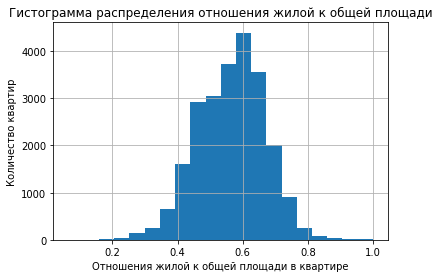

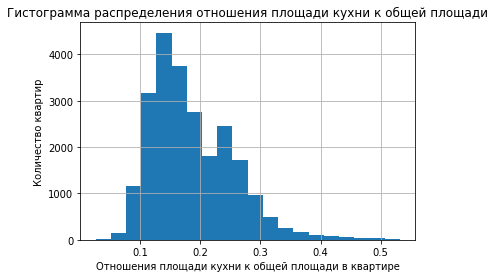

In [45]:
data_flat_chek = data_flat_query.loc[:, ['last_price', 'price_for_meter', 'days_exposition', 'ceiling_height', 'rooms', 'living_to_total_area', 'kitchen_to_total_area']]

for column in data_flat_chek:
   
    qr = data_flat_query[column].quantile(.75) - data_flat_query[column].quantile(.25) #считает межквартильный размах
   
    mini = data_flat_query[column].min() # считает нижний диапазон
    qmin = data_flat_query[column].quantile(.25) - qr * 3
    if qmin < mini:
        qmin = mini
    else:
        qmin = qmin
   
    maxi = data_flat_query[column].max() # считает верхний диапазон
    qmax = data_flat_query[column].quantile(.75) + qr * 3
    if qmax > maxi:
        qmax = maxi
    else:
        qmax = qmax
       
    if column == 'last_price':
        hist_name = 'Гистограмма распределения цены на момент снятия с публикации'
        x_axis_name = 'Цена (млн.руб)'
        y_axis_name = 'Количество квартир'
    elif column == 'price_for_meter':
        hist_name = 'Гистограмма распределения цены за квадратный метр'   
        x_axis_name = 'Цена за квадратный метр (рублей)'
        y_axis_name = 'Количество квартир'
    elif column == 'days_exposition':
        hist_name = 'Гистограмма распределения количества дней экспозиции'   
        x_axis_name = 'Количество дней экспозиции'
        y_axis_name = 'Количество квартир' 
    elif column == 'ceiling_height':
        hist_name = 'Гистограмма распределения высоты потолков'   
        x_axis_name = 'Высота потолка (м)'
        y_axis_name = 'Количество квартир'
    elif column == 'rooms':    
        hist_name = 'Гистограмма распределения количества комнат'   
        x_axis_name = 'Количество комнат в квартире'
        y_axis_name = 'Количество квартир'  
    elif column == 'living_to_total_area':    
        hist_name = 'Гистограмма распределения отношения жилой к общей площади'   
        x_axis_name = 'Отношения жилой к общей площади в квартире'
        y_axis_name = 'Количество квартир'      
    elif column == 'kitchen_to_total_area':    
        hist_name = 'Гистограмма распределения отношения площади кухни к общей площади'   
        x_axis_name = 'Отношения площади кухни к общей площади в квартире'
        y_axis_name = 'Количество квартир'   
        
    data_flat_chek.hist(column, bins = 20, range = ((qmin), (qmax))) #строит гистограммы в нужном диапазоне   
    plt.title(hist_name) # заголовок гистограммы
    plt.ylabel(y_axis_name) # y-метка
    plt.xlabel(x_axis_name) # x-метка

Гистограмма цены за квадратный метр еще больше стала похожа на нормальное распределение.   
На гистограмме дней до продажи квартиры имеется явный пик примерно 1.5 месяца. <font color='blue'> На гистограмме распределения высоты потолков видно большое количестве квартир со значением высоты потолка 0 (почти 9000, что более 10% от общей выборки). Однако попытка избавится от этих записей, количество которых существенно, приведет к искажению результатов анализа.</font>
 

Визуализируем данные для зависимости цены квадратного метра от числа комнат с помощью графика boxplot

Text(0.5, 0, 'Количество комнат')

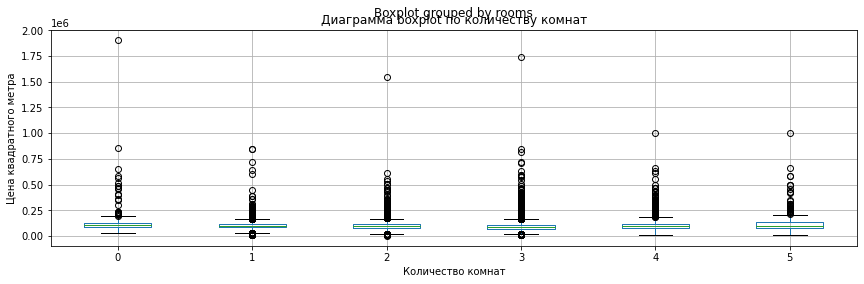

In [46]:
data_flat_query.boxplot('price_for_meter', by = 'rooms', figsize = (14, 4))
plt.title('Диаграмма boxplot по количеству комнат')
plt.ylabel('Цена квадратного метра')
plt.xlabel('Количество комнат')

Данные были очищены от выбросов

4) Исследуем какие факторы больше всего влияют на стоимость квартиры. Исследуем, зависимость цена квадратного метра от числа комнат, удалённости от центра. Исследуем зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также исследуем зависимость от даты размещения: дня недели, месяца и года.

Посмотрим линейную корреляцию цены за квадратный метр с остальными параметрами

In [47]:
data_flat_query.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_median,price_for_meter,living_to_total_area,kitchen_to_total_area,weekday,month,year
total_images,1.000000,0.156825,0.126016,0.100069,0.107080,0.010427,0.113601,0.031340,0.039860,-0.029303,...,-0.011553,-0.003034,0.018031,NaN,0.132780,0.005258,-0.028338,-0.010433,0.005043,0.140411
last_price,0.156825,1.000000,0.693864,0.444126,0.134041,0.185948,0.572044,0.127641,-0.013406,-0.069579,...,0.144586,-0.050716,0.049277,NaN,0.608317,0.038396,-0.144792,-0.014236,0.005360,-0.003161
total_area,0.126016,0.693864,1.000000,0.784886,0.100624,-0.022241,0.911373,-0.020112,-0.021853,-0.112063,...,0.126244,-0.053277,0.109284,NaN,0.117349,0.237643,-0.395428,-0.011361,0.006441,-0.061731
rooms,0.100069,0.444126,0.784886,1.000000,0.096507,-0.207838,0.870983,-0.145722,-0.017839,-0.156349,...,0.069867,-0.030799,0.098204,NaN,0.004451,0.489647,-0.573563,0.000460,0.000448,-0.060036
ceiling_height,0.107080,0.134041,0.100624,0.096507,1.000000,-0.105822,0.113344,-0.073537,-0.044225,-0.013012,...,0.039898,-0.018788,0.047958,NaN,0.100825,0.061974,-0.068523,-0.049713,-0.026192,0.154434
floors_total,0.010427,0.185948,-0.022241,-0.207838,-0.105822,1.000000,-0.150840,0.678059,-0.003472,0.070151,...,-0.122735,0.038864,-0.052924,NaN,0.148098,-0.354425,0.340139,0.013151,0.016651,0.007845
living_area,0.113601,0.572044,0.911373,0.870983,0.113344,-0.150840,1.000000,-0.108112,-0.018253,-0.073282,...,0.108140,-0.048224,0.103580,NaN,0.061652,0.532609,-0.570624,-0.006657,0.001401,-0.052903
floor,0.031340,0.127641,-0.020112,-0.145722,-0.073537,0.678059,-0.108112,1.000000,-0.006182,0.036940,...,-0.076312,0.024850,-0.040829,NaN,0.129068,-0.255389,0.236286,0.012347,0.019387,0.004915
is_apartment,0.039860,-0.013406,-0.021853,-0.017839,-0.044225,-0.003472,-0.018253,-0.006182,1.000000,0.003569,...,-0.009599,0.019909,-0.061846,NaN,0.006406,0.002026,0.002068,0.008751,0.111619,0.216585
studio,-0.029303,-0.069579,-0.112063,-0.156349,-0.013012,0.070151,-0.073282,0.036940,0.003569,1.000000,...,0.000939,0.002606,-0.029978,NaN,0.015636,0.090768,0.055044,-0.000843,0.000976,0.011961


Визуализируем матрицу корреляции

<AxesSubplot:>

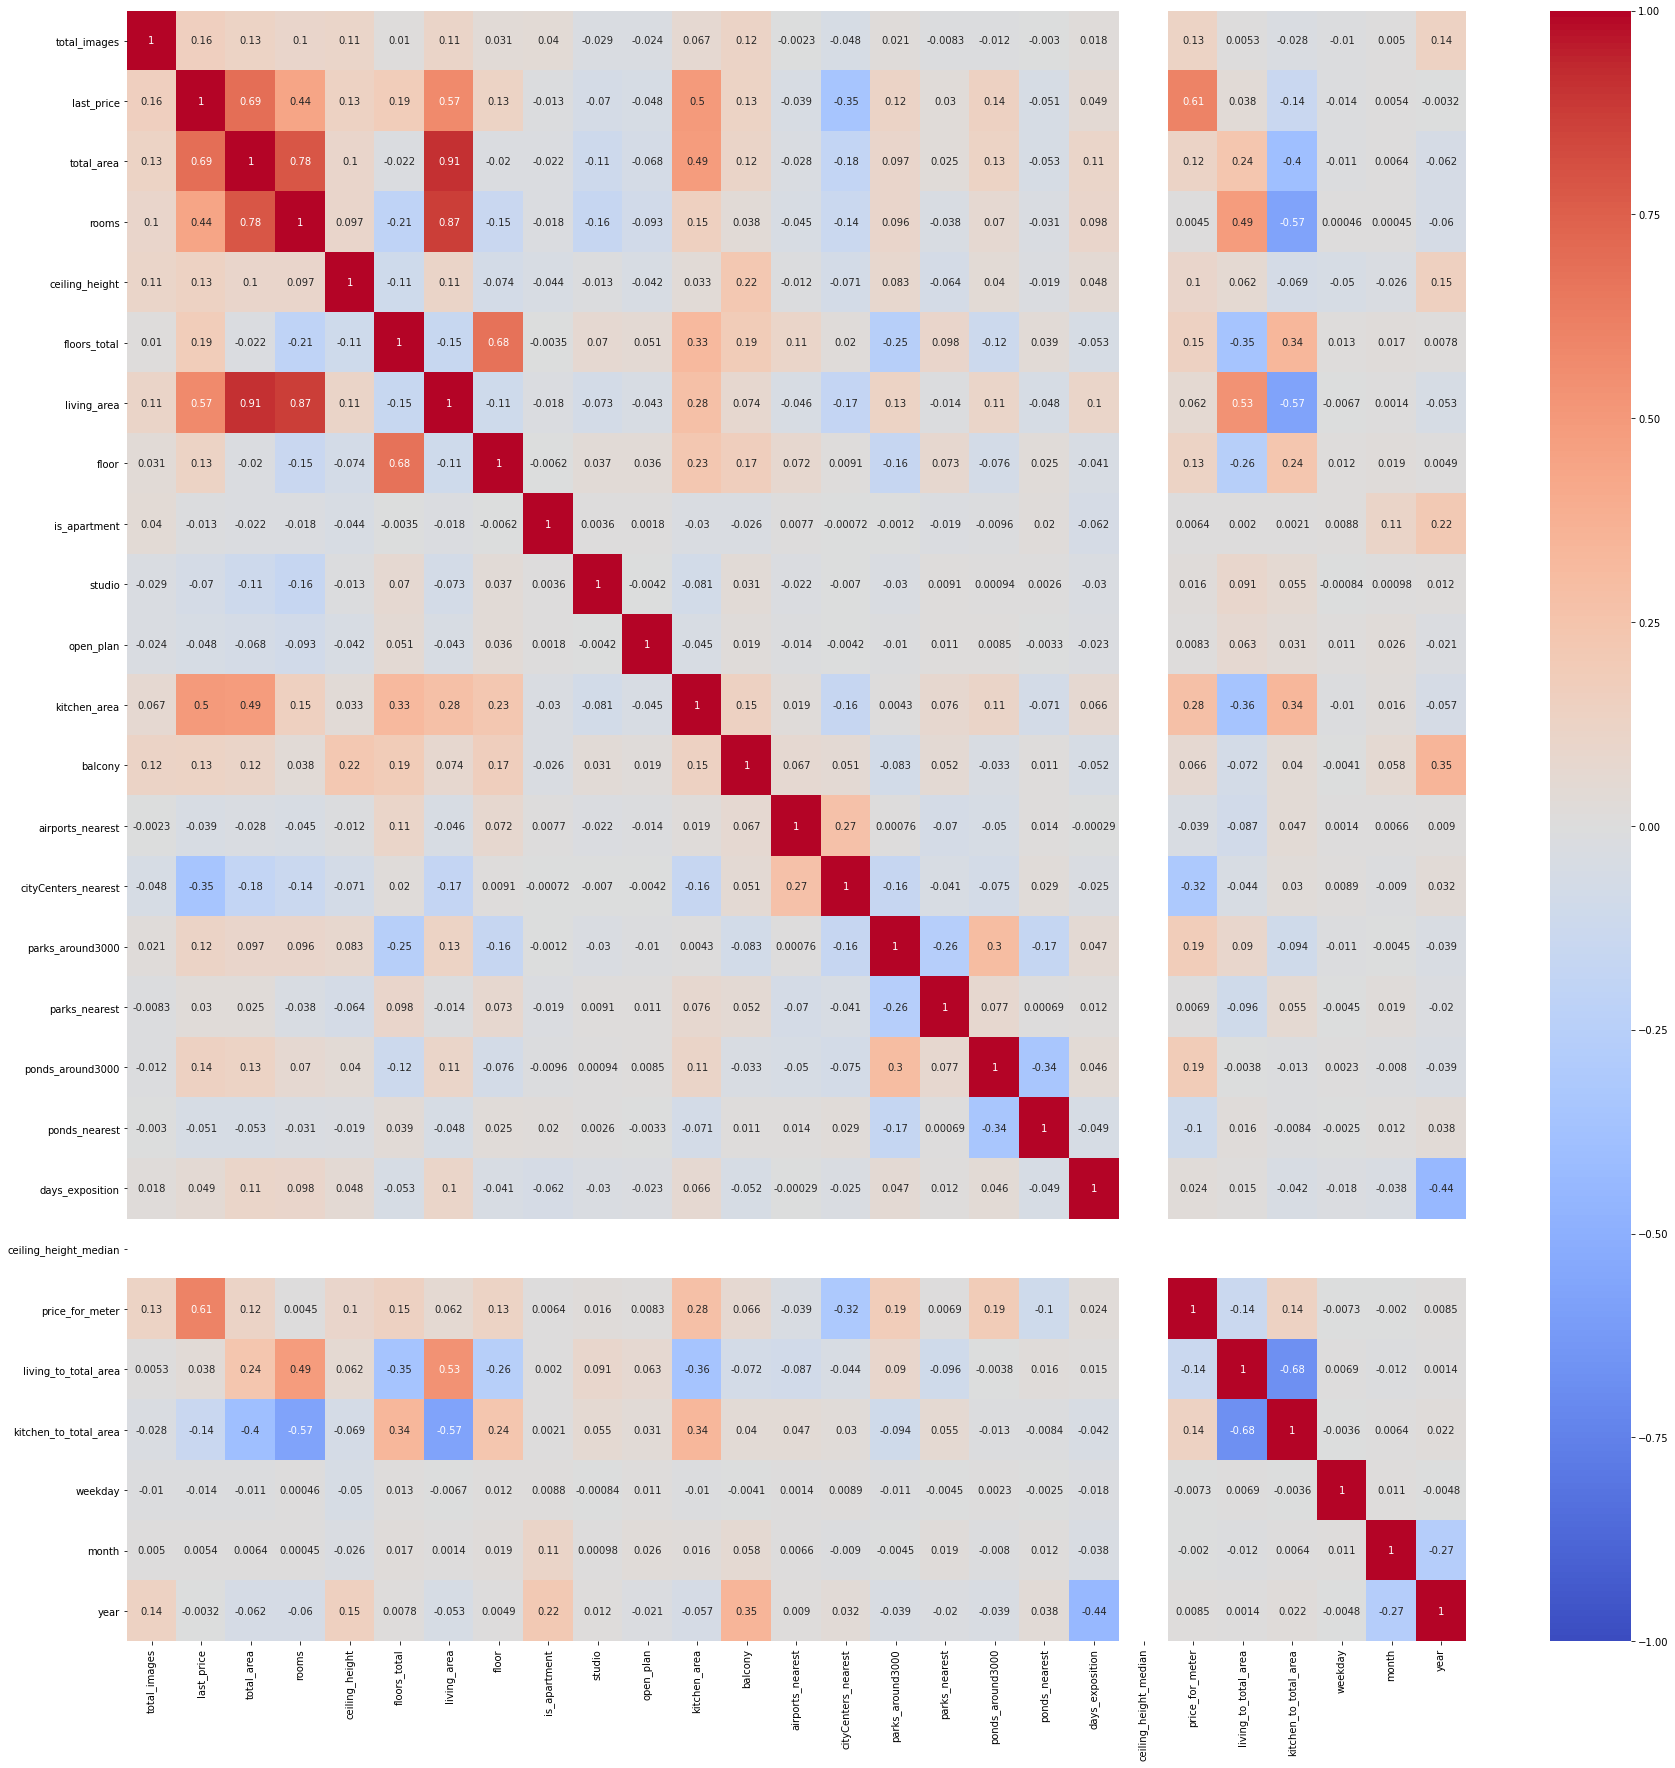

In [48]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(data_flat_query.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', ax = ax)

Есть некоторая корреляция между стоимостью квадратного метра и размером квартиры,высотой потолков, размером кухни, наличием парков. Отрицательная корреляция с расстоянием до центра.

Выделим параметры стоимость квадратного метра, площадь квартиры, количество комнат в отдельную таблицу

In [49]:
data_flat_query_matrix = data_flat_query.loc[:, ['price_for_meter', 'total_area', 'rooms']]

Посмотрим диаграммы рассеяния

array([[<AxesSubplot:xlabel='price_for_meter', ylabel='price_for_meter'>,
        <AxesSubplot:xlabel='total_area', ylabel='price_for_meter'>,
        <AxesSubplot:xlabel='rooms', ylabel='price_for_meter'>],
       [<AxesSubplot:xlabel='price_for_meter', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>],
       [<AxesSubplot:xlabel='price_for_meter', ylabel='rooms'>,
        <AxesSubplot:xlabel='total_area', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>]], dtype=object)

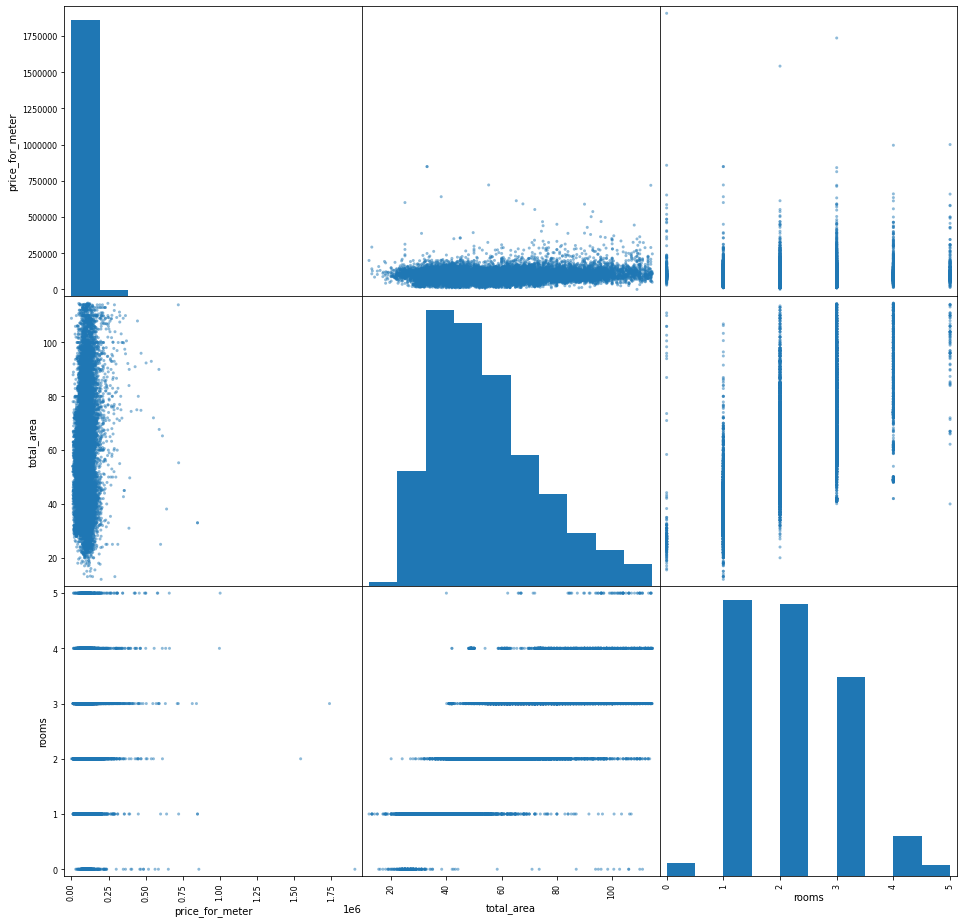

In [50]:
pd.plotting.scatter_matrix(data_flat_query_matrix, figsize=(16, 16))

На графиках рассеяния явной зависимости цены квадратного метра и количеством комнат, либо площадью квартиры не видно. <font color='blue'> Поэтому построим диаграммы рассеяния и корреляции.</font>

Предварительно введем функцию, которая создает новый столбец с типом этажа

In [51]:
#Создаём функцию для заполнения нового столбца с типом этажа
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
Flats['floor_type'] = data_flat_query.apply(floor_group, axis=1)

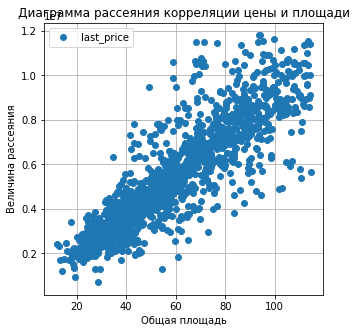

            last_price  total_area
last_price    1.000000    0.905255
total_area    0.905255    1.000000 



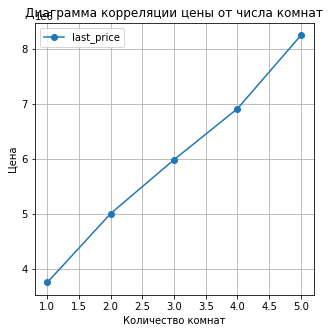

            last_price     rooms
last_price    1.000000  0.538349
rooms         0.538349  1.000000 



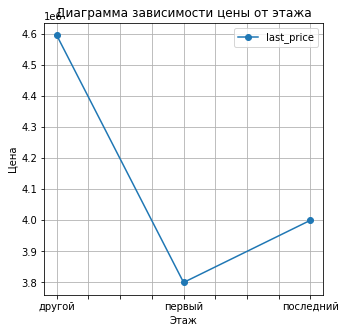

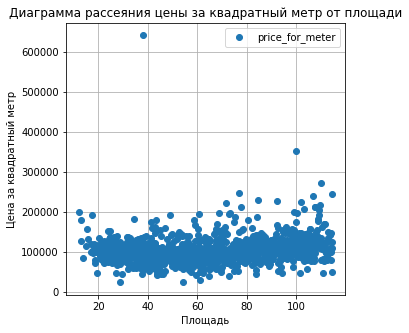

                 price_for_meter  total_area
price_for_meter         1.000000    0.049369
total_area              0.049369    1.000000 



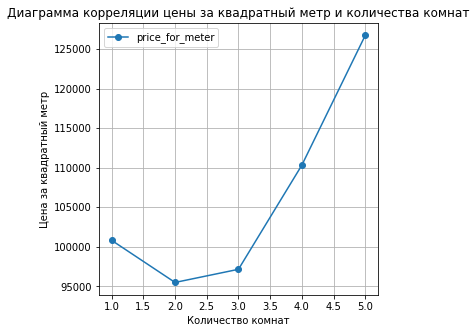

                 price_for_meter     rooms
price_for_meter         1.000000 -0.259338
rooms                  -0.259338  1.000000 



In [52]:
# Зависимость цены от площади
(
     data_flat_query.pivot_table(index='total_area', values='last_price')
     .plot(grid=True, style='o', figsize=(5, 5))
)
plt.title('Диаграмма рассеяния корреляции цены и площади') # заголовок диаграммы
plt.ylabel('Величина рассеяния') # y-метка
plt.xlabel('Общая площадь') # x-метка
plt.show()
print(data_flat_query.pivot_table(index='floor', values=['total_area', 'last_price']).corr(),'\n')

# Зависимость цены от числа комнат
(
     data_flat_query.query('rooms > 0').pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Диаграмма корреляции цены от числа комнат') # заголовок диаграммы
plt.ylabel('Цена') # y-метка
plt.xlabel('Количество комнат') # x-метка
plt.show()
print(data_flat_query.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')

# Зависимость цены от удалённости от центра
#(
#     Flats.pivot_table(index='cityCenters_nearest', values='last_price')
#     .plot(grid=True, style='o', figsize=(5, 5))
#)
#plt.title('Диаграмма рассеяния корреляции цены и удалённости от центра') # заголовок диаграммы
#plt.ylabel('Цена') # y-метка
#plt.xlabel('Удаленность от центра') # x-метка
#plt.show()
#print(Flats.pivot_table(index='floor', values=['cityCenters_nearest', 'last_price']).corr(),'\n')
# Зависимость цены от этажа
(
     data_flat_query.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Диаграмма зависимости цены от этажа') # заголовок диаграммы
plt.ylabel('Цена') # y-метка
plt.xlabel('Этаж') # x-метка
plt.show()

# Зависимость цены за квадратный метр от площади
(
     data_flat_query.pivot_table(index='total_area', values='price_for_meter')
     .plot(grid=True, style='o', figsize=(5, 5))
)
plt.title('Диаграмма рассеяния цены за квадратный метр от площади') # заголовок диаграммы
plt.ylabel('Цена за квадратный метр') # y-метка
plt.xlabel('Площадь') # x-метка
plt.show()
print(data_flat_query.pivot_table(index='floor', values=['total_area', 'price_for_meter']).corr(),'\n')
# Зависимость цены за квадрат от числа комнат
(
      data_flat_query.query('rooms > 0').pivot_table(index='rooms', values='price_for_meter')
      .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Диаграмма корреляции цены за квадратный метр и количества комнат') # заголовок диаграммы
plt.ylabel('Цена за квадратный метр') # y-метка
plt.xlabel('Количество комнат') # x-метка

plt.show()
print(data_flat_query.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'price_for_meter']).corr(),'\n')


Перед изучением цены продажи от расстояния квартиры до центра исключим пропущенные значения.

In [53]:
data_flat_query = data_flat_query.dropna(subset=['cityCenters_nearest'])
#Проверяем
data_flat_query['cityCenters_nearest'].isna().mean()

0.0

Посмотрим гистограмму

Text(0.5, 0, 'Удаленность от центра')

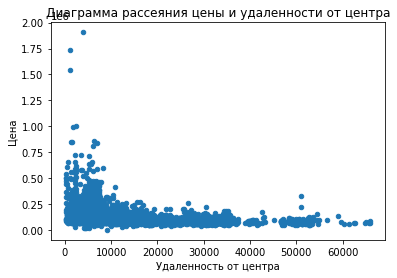

In [54]:
data_flat_query.plot(x='cityCenters_nearest', y='price_for_meter', kind='scatter')
plt.title('Диаграмма рассеяния цены и удаленности от центра')
plt.ylabel('Цена') # y-метка
plt.xlabel('Удаленность от центра') # x-метка

Для квартир в самом центре города разброс цены в большую сторону значительно выше.



<font color='blue'> Можно сделать вывод о наличии в самом центре города квартир, ценообразование которых зависит от иных, кроме исследуемых факторов. К примеру факторов престижности жилья, исторической ценности и т.д. </font>  


Выделим параметры стоимость квадратного метра, день недели, месяц, год

In [55]:
data_flat_query_matrix = data_flat_query.loc[:, ['price_for_meter', 'weekday', 'month', 'year']]

Рассмотрим рассеяние

array([[<AxesSubplot:xlabel='price_for_meter', ylabel='price_for_meter'>,
        <AxesSubplot:xlabel='weekday', ylabel='price_for_meter'>,
        <AxesSubplot:xlabel='month', ylabel='price_for_meter'>,
        <AxesSubplot:xlabel='year', ylabel='price_for_meter'>],
       [<AxesSubplot:xlabel='price_for_meter', ylabel='weekday'>,
        <AxesSubplot:xlabel='weekday', ylabel='weekday'>,
        <AxesSubplot:xlabel='month', ylabel='weekday'>,
        <AxesSubplot:xlabel='year', ylabel='weekday'>],
       [<AxesSubplot:xlabel='price_for_meter', ylabel='month'>,
        <AxesSubplot:xlabel='weekday', ylabel='month'>,
        <AxesSubplot:xlabel='month', ylabel='month'>,
        <AxesSubplot:xlabel='year', ylabel='month'>],
       [<AxesSubplot:xlabel='price_for_meter', ylabel='year'>,
        <AxesSubplot:xlabel='weekday', ylabel='year'>,
        <AxesSubplot:xlabel='month', ylabel='year'>,
        <AxesSubplot:xlabel='year', ylabel='year'>]], dtype=object)

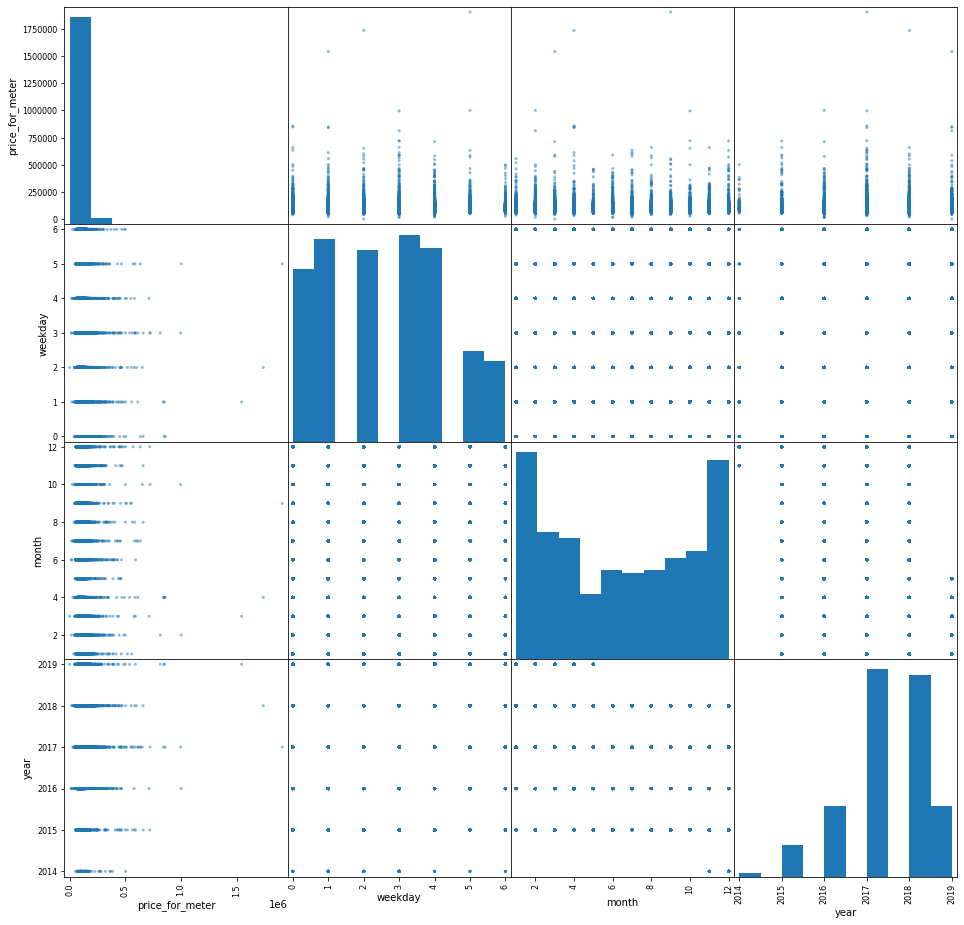

In [56]:
pd.plotting.scatter_matrix(data_flat_query_matrix, figsize=(16, 16))

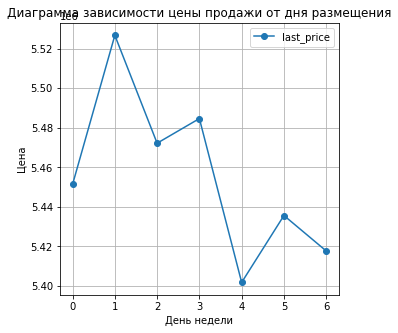

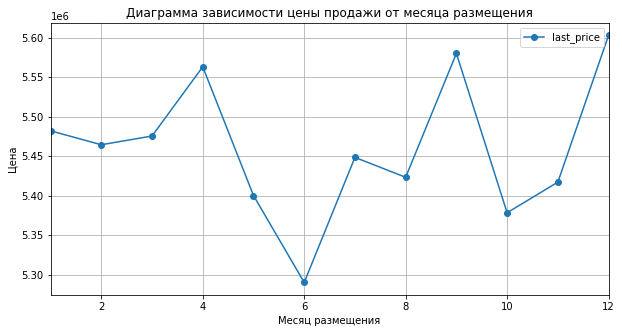

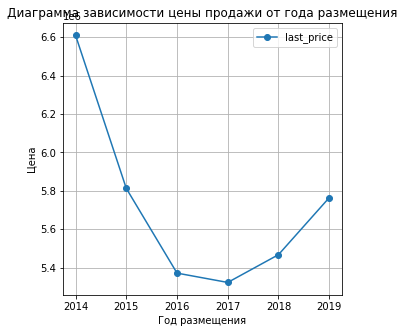

In [57]:
# Зависимость от дня размещения
(
    data_flat_query.pivot_table(index='weekday', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Диаграмма зависимости цены продажи от дня размещения') # заголовок диаграммы
plt.ylabel('Цена') # y-метка
plt.xlabel('День недели') # x-метка


plt.show()
# Зависимость от месяца размещения
(
    data_flat_query.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)
plt.title('Диаграмма зависимости цены продажи от месяца размещения') # заголовок диаграммы
plt.ylabel('Цена') # y-метка
plt.xlabel('Месяц размещения') # x-метка
plt.show()

# Зависимость от года размещения
(
    data_flat_query.pivot_table(index='year', values='last_price')
   .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Диаграмма зависимости цены продажи от года размещения') # заголовок диаграммы
plt.ylabel('Цена') # y-метка
plt.xlabel('Год размещения') # x-метка
plt.show()

В связи с несущественным изменением цены явной зависимости между ценой продажи и днем недели выставления объявления нет.  
Тоже самое относится к зависимости от месяца размещения.   
В 2015,2016,2018,2019 году цена продажи была в среднем выше, чем в 2017 году. 

<AxesSubplot:xlabel='floor_type', ylabel='price_for_meter'>

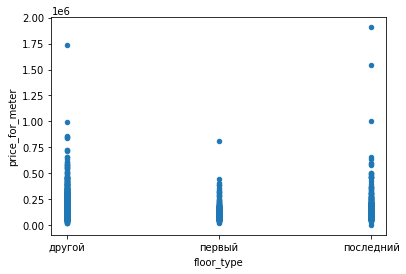

In [58]:
data_flat_query.plot(x='floor_type', y='price_for_meter', kind='scatter')

Цены квадратного метра на 1-ом этаже ниже, чем на других. Самая высокая цена квадратного метра на средних этажах.

5) В соответствии с условиями задачи выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья (в столбце 'locality_name').

Выделим строку с 10 городами с наибольшим числом объявлений

In [59]:
top_city = data_flat_query['locality_name'].value_counts().sort_values(ascending=False).head(10).index

Сделаем выборку из датасета по эти 10 городам и средней стоимости квадратного метра квартиры в них

In [60]:
data_flat_top_city = data_flat_query.query('locality_name in @top_city').pivot_table(index='locality_name', values='price_for_meter', aggfunc='mean').reset_index()

Отсортируем города по средней цене квадратного метра

In [61]:
data_flat_top_city = data_flat_top_city.sort_values(by = 'price_for_meter', ascending = False).reset_index()

Выведем результат

In [62]:
data_flat_top_city

,index,locality_name,price_for_meter
0,6,Санкт-Петербург,114687.997568
1,5,Пушкин,103070.374746
2,7,Сестрорецк,101757.616875
3,8,посёлок Парголово,90175.913458
4,4,Петергоф,84757.559690
5,2,Кронштадт,79380.168043
6,9,посёлок Шушары,78474.361643
7,0,Колпино,75402.500198
8,3,Ломоносов,72609.798019
9,1,Красное Село,72009.435483


Визуализируем

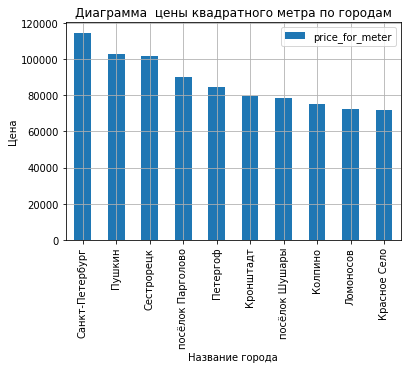

In [63]:
data_flat_top_city.plot(x='locality_name', y='price_for_meter', grid = True, kind = 'bar')
plt.title('Диаграмма  цены квадратного метра по городам') # заголовок диаграммы
plt.ylabel('Цена') # y-метка
plt.xlabel('Название города') # x-метка
plt.show()

Среди городов с наибольшим числом объявлений , самые высокие цены за квадратный метр квартиры в Санкт-Петербурге, Пушкине и Сестрорецке, а вамые низкие цены в Красном Селе, Ломоносове и Колпино.

6) В соответствии с условиями задачи изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выберем  квартиры в Санкт-Петербурге ('locality_name'). Выясним, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлим его до целых значений. После этого посчитаем среднюю цену для каждого километра. Построим график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется — это и будет центральная зона.

Отбираем Петербург

In [64]:
city_center_price = data_flat_query.loc[Flats['locality_name'] == 'Санкт-Петербург']

Создаем столбец с километрами

In [65]:
# отключим предупреждения
import warnings
warnings.filterwarnings('ignore')

In [66]:
city_center_price['km_to_cityCenters'] = (city_center_price['cityCenters_nearest'] / 1000).astype(int)
city_center_price.head(10)#Проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ceiling_height_median,price_for_meter,floor_category,living_to_total_area,kitchen_to_total_area,weekday,month,year,floor_type,km_to_cityCenters
0,20,NaN,108.0,2019-03-07,3,2.70,16.0,51.000,8,True,...,0,120370.370370,другой,0.472222,0.231481,3,3,2019,другой,16
2,10,5196000.0,56.0,2015-08-20,2,0.00,5.0,34.300,4,True,...,0,92785.714286,другой,0.612500,0.148214,3,8,2015,другой,13
3,0,NaN,NaN,2015-07-24,3,0.00,14.0,NaN,9,True,...,0,408176.100629,другой,0.630000,0.110000,4,7,2015,другой,6
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000,13,True,...,0,100000.000000,другой,0.320000,0.410000,1,6,2018,другой,8
7,5,7915000.0,71.6,2019-04-18,2,0.00,24.0,41.886,22,True,...,0,110544.692737,другой,0.585000,0.263966,3,4,2019,другой,11
9,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.600,7,True,...,0,88524.590164,другой,0.714754,0.106557,6,2,2017,другой,15
10,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.300,3,True,...,0,127525.252525,другой,0.512626,0.214646,3,11,2017,другой,13
15,16,4650000.0,39.0,2017-11-18,1,0.00,14.0,20.500,5,True,...,0,119230.769231,другой,0.525641,0.194872,5,11,2017,другой,14
16,11,6700000.0,82.0,2017-11-23,3,3.05,5.0,55.600,1,True,...,0,81707.317073,первый,0.678049,0.109756,3,11,2017,первый,10
17,6,4180000.0,36.0,2016-09-09,1,0.00,17.0,16.500,7,True,...,0,116111.111111,другой,0.458333,0.305556,4,9,2016,другой,14


Группируем данные по средней цене квадратного метра и строим график

<AxesSubplot:xlabel='km_to_cityCenters'>

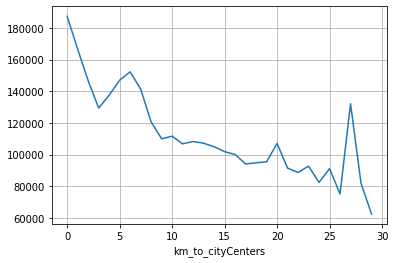

In [67]:
city_center_price_grouped = city_center_price.groupby(['km_to_cityCenters'])['price_for_meter'].mean().astype(int)
city_center_price_grouped.plot(x='km_to_cityCenters', y='price_for_meter', grid = True)

Цена за квадратный метр квартиры в Санкт - Петербурге начинает падать примерно с 6 км, резко падать от 10 км от центра, эту зону можно принять за центр города. При этом на 27 км имеется скачок цен.

7) В соответствии с условиями задачи выделим сегмент квартир в центре. Проанализируем эту территорию и изучим параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделаем выводы в .ч. о том отличаются ли они от общих выводов по всему городу?

Посмотрим основные параметры для Санкт-Петербурга. Создадим столбец с километрами и избавимся от пропусков

In [68]:
data_flat_query['km_to_cityCenters'] = (data_flat_query['cityCenters_nearest'] / 1000).astype(int)
data_flat_query = data_flat_query.dropna(subset=['km_to_cityCenters'])
data_flat_piter = data_flat_query.query('locality_name == "Санкт-Петербург"').groupby(['locality_name']).agg({'last_price':'median', 'price_for_meter':'median', 'total_area':'median', 'rooms':'median', 'ceiling_height':'mean', 'km_to_cityCenters':'mean'}).sort_values(by = 'price_for_meter', ascending = False)
data_flat_piter

,last_price,price_for_meter,total_area,rooms,ceiling_height,km_to_cityCenters
locality_name,,,,,,
Санкт-Петербург,5150000.0,104687.5,52.0,2,1.776358,11.103895


Рассмотрим основные параметры для центра Санкт-Петербурга 

In [69]:
data_flat_piter_center = city_center_price.query('km_to_cityCenters <= 3').groupby(['locality_name']).agg({'last_price':'median', 'price_for_meter':'median', 'total_area':'median', 'rooms':'median', 'ceiling_height':'mean', 'km_to_cityCenters':'mean'}).sort_values(by = 'price_for_meter', ascending = False)
data_flat_piter_center

,last_price,price_for_meter,total_area,rooms,ceiling_height,km_to_cityCenters
locality_name,,,,,,
Санкт-Петербург,7600000.0,116150.0,72.0,3,2.191305,2.098361


Для Санкт-Петербурга построим графики рассеивания.
Выделим параметры цена продажи, стоимость квадратного метра, площадь квартиры, количество комнат в отдельную таблицу.

In [70]:
data_piter = data_flat_query.query('locality_name == "Санкт-Петербург"')
data_flat_piter_matrix = data_piter.query('locality_name == "Санкт-Петербург"').loc[:, ['last_price', 'price_for_meter', 'total_area', 'rooms', 'ceiling_height','km_to_cityCenters']]

Рассмотрим рассеяние для Санкт Петербурга

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='price_for_meter', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='ceiling_height', ylabel='last_price'>,
        <AxesSubplot:xlabel='km_to_cityCenters', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='price_for_meter'>,
        <AxesSubplot:xlabel='price_for_meter', ylabel='price_for_meter'>,
        <AxesSubplot:xlabel='total_area', ylabel='price_for_meter'>,
        <AxesSubplot:xlabel='rooms', ylabel='price_for_meter'>,
        <AxesSubplot:xlabel='ceiling_height', ylabel='price_for_meter'>,
        <AxesSubplot:xlabel='km_to_cityCenters', ylabel='price_for_meter'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='price_for_meter', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', yla

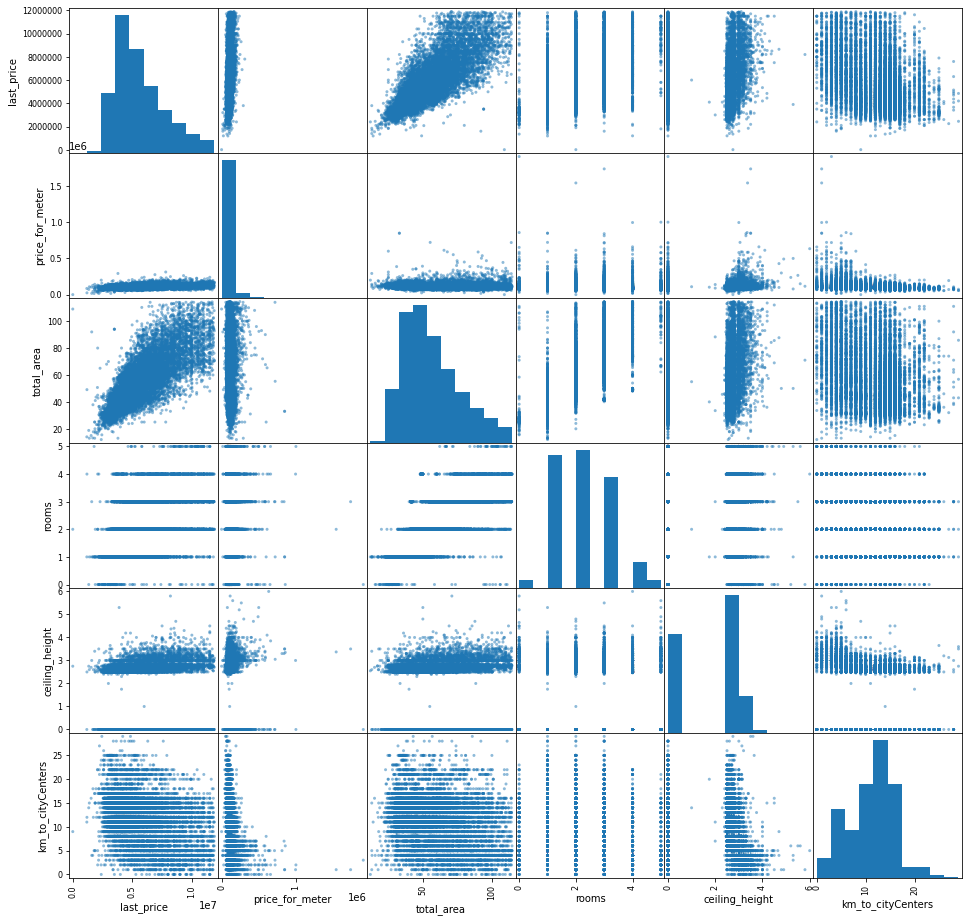

In [71]:
pd.plotting.scatter_matrix(data_flat_piter_matrix, figsize=(16, 16))

Построим зависимость стоимости квартиры от этажа в Санкт-Петербурге и в центре Санкт-Петербурга

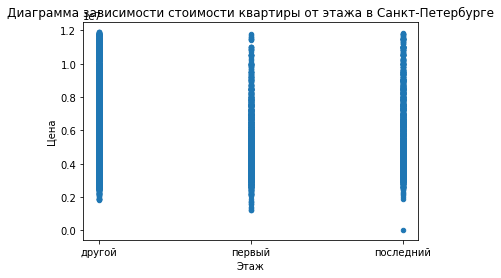

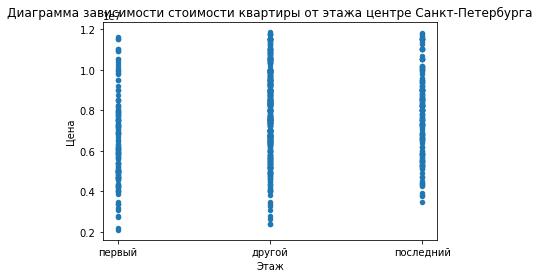

In [72]:
data_piter.plot(x='floor_type', y='last_price', kind='scatter')
plt.title('Диаграмма зависимости стоимости квартиры от этажа в Санкт-Петербурге') # заголовок диаграммы
plt.ylabel('Цена') # y-метка
plt.xlabel('Этаж') # x-метка
plt.show()
data_piter_center = data_piter.query('km_to_cityCenters <= 3')
data_piter_center.plot(x='floor_type', y='last_price', kind='scatter')
plt.title('Диаграмма зависимости стоимости квартиры от этажа центре Санкт-Петербурга') # заголовок диаграммы
plt.ylabel('Цена') # y-метка
plt.xlabel('Этаж') # x-метка
plt.show()

<font color='blue'> Из указанных диаграмм следует, что разброс стоимости квартиры в центре более значительный, чем в Санкт-Петербурге в целом. </font>   

Посмотрим зависимость стоимости цены от количства комнат в Санкт-Петербурге

In [73]:
data_piter['rooms'].value_counts()

2    5088
1    4916
3    4108
4     967
0     293
5     288
Name: rooms, dtype: int64

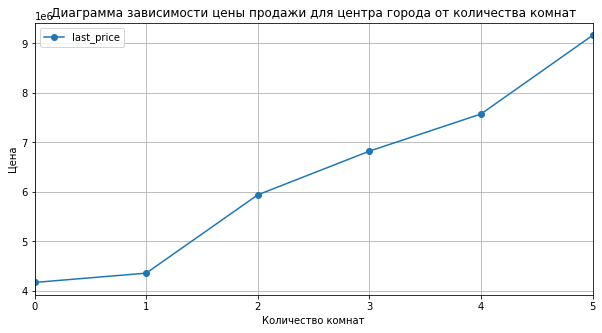

In [75]:
# Зависимость для всего города цены от количества комнат
(
    data_piter.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,5), figsize=(10, 5))
)
plt.title('Диаграмма зависимости цены продажи для центра города от количества комнат') # заголовок диаграммы
plt.ylabel('Цена') # y-метка
plt.xlabel('Количество комнат') # x-метка
plt.show()

Проведением анализ для центра города: зависимости цены от количества комнат.

In [76]:
data_piter_center['rooms'].value_counts()

3    347
2    330
4    190
1    110
5    103
0     79
Name: rooms, dtype: int64

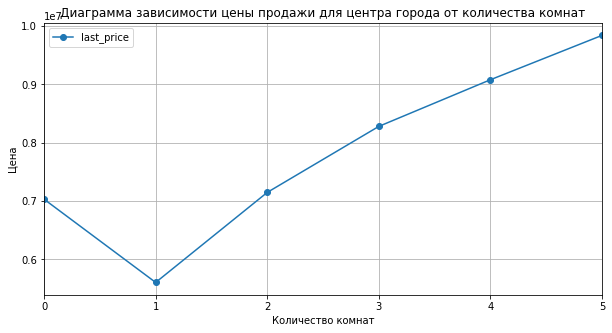

In [77]:
# Зависимость для центра города цены от количества комнат
(
    data_piter_center.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,5), figsize=(10, 5))
)
plt.title('Диаграмма зависимости цены продажи для центра города от количества комнат') # заголовок диаграммы
plt.ylabel('Цена') # y-метка
plt.xlabel('Количество комнат') # x-метка
plt.show()

Посмотрим зависимость стоимости квартиры от категории этажей в Санкт-Петербурге

In [78]:
data_piter['floor_type'].value_counts()

другой       12166
последний     1898
первый        1596
Name: floor_type, dtype: int64

Text(0.5, 0, 'Категория этажей')

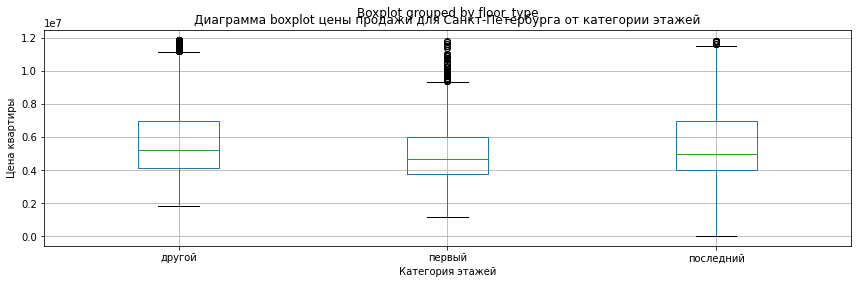

In [79]:
data_piter.boxplot('last_price', by = 'floor_type', figsize = (14, 4))
plt.title('Диаграмма boxplot цены продажи для Санкт-Петербурга от категории этажей')
plt.ylabel('Цена квартиры')
plt.xlabel('Категория этажей')

In [ ]:
Посмотрим зависимость стоимости квартиры от категории этажей в центре Санкт-Петербурга

In [80]:
data_piter_center['floor_type'].value_counts()

другой       727
последний    268
первый       164
Name: floor_type, dtype: int64

Text(0.5, 0, 'Категория этажей')

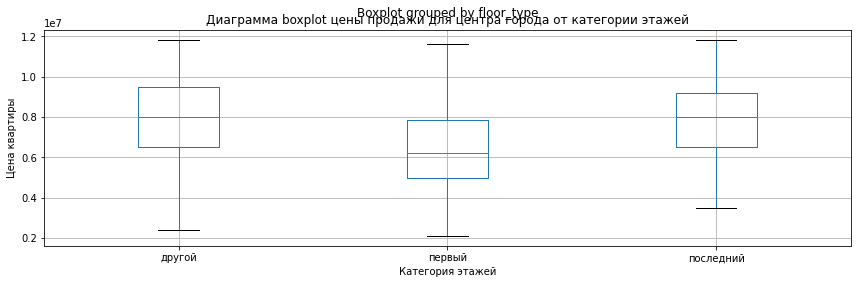

In [81]:
data_piter_center.boxplot('last_price', by = 'floor_type', figsize = (14, 4))
plt.title('Диаграмма boxplot цены продажи для центра города от категории этажей')
plt.ylabel('Цена квартиры')
plt.xlabel('Категория этажей')

Посмотрим зависимость стоимости квартиры от месяца объявления в Санкт-Петербурге

In [82]:
data_piter['month'].value_counts()

2     1732
3     1673
4     1620
11    1577
10    1441
9     1322
8     1191
7     1150
6     1140
12    1033
1      928
5      853
Name: month, dtype: int64

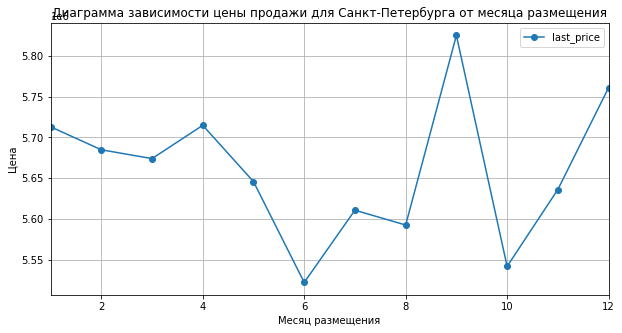

In [83]:
# Зависимость для всего города от месяца размещения
(
    data_piter.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)
plt.title('Диаграмма зависимости цены продажи для Санкт-Петербурга от месяца размещения') # заголовок диаграммы
plt.ylabel('Цена') # y-метка
plt.xlabel('Месяц размещения') # x-метка
plt.show()

Проведением анализ для центра города: зависимости цены от месяца размещения.

In [84]:
data_piter_center['month'].value_counts()

2     129
11    123
3     118
4     116
9     101
7      99
10     94
6      85
12     83
1      77
8      74
5      60
Name: month, dtype: int64

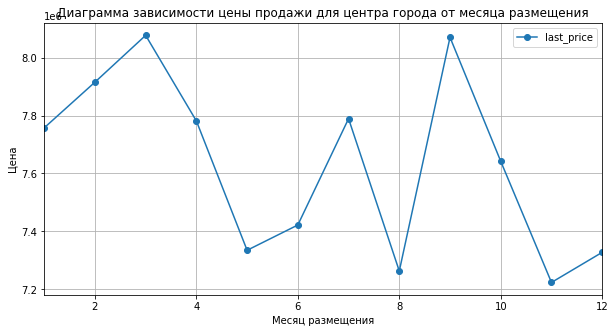

In [85]:
# Зависимость для центра от месяца размещения
(
    data_piter_center.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)
plt.title('Диаграмма зависимости цены продажи для центра города от месяца размещения') # заголовок диаграммы
plt.ylabel('Цена') # y-метка
plt.xlabel('Месяц размещения') # x-метка
plt.show()

Посмотрим зависимость стоимости квартиры от года объявления в Санкт-Петербурге

In [86]:
data_piter['year'].value_counts()

2017    5518
2018    5368
2019    1967
2016    1861
2015     847
2014      99
Name: year, dtype: int64

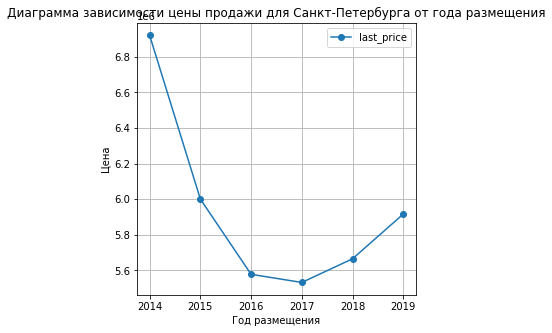

In [87]:
# Зависимость для всего города от года размещения
(
    data_piter.pivot_table(index='year', values='last_price')
   .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Диаграмма зависимости цены продажи для Санкт-Петербурга от года размещения') # заголовок диаграммы
plt.ylabel('Цена') # y-метка
plt.xlabel('Год размещения') # x-метка
plt.show()

Проведением анализ для центра города: зависимости цены от года размещения.

In [88]:
data_piter_center['year'].value_counts()

2017    418
2018    340
2016    147
2019    127
2015    118
2014      9
Name: year, dtype: int64

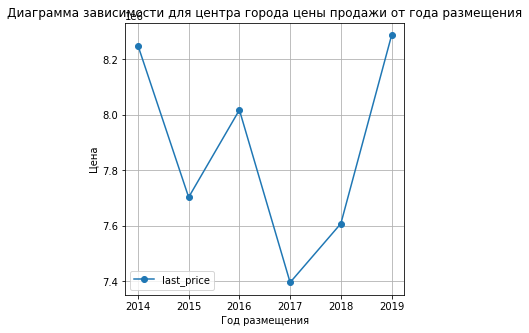

In [89]:
# Зависимость для центра города от года размещения
(
    data_piter_center.pivot_table(index='year', values='last_price')
   .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Диаграмма зависимости для центра города цены продажи от года размещения') # заголовок диаграммы
plt.ylabel('Цена') # y-метка
plt.xlabel('Год размещения') # x-метка
plt.show()

Посмотрим зависимость стоимости квартиры от дня недели объявления в Санкт-Петербурге

In [90]:
data_piter['weekday'].value_counts()

3    2832
1    2825
4    2651
2    2650
0    2360
5    1249
6    1093
Name: weekday, dtype: int64

Text(0.5, 0, 'День недели')

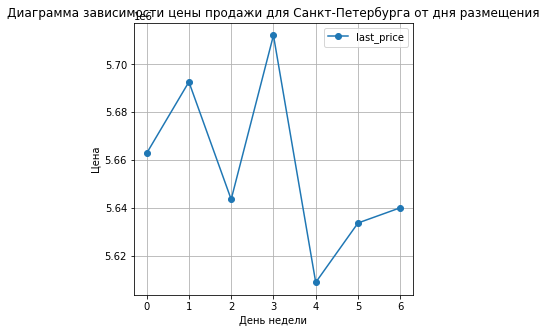

In [91]:
# Зависимость для всего города от дня размещения
(
    data_piter.pivot_table(index='weekday', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Диаграмма зависимости цены продажи для Санкт-Петербурга от дня размещения') # заголовок диаграммы
plt.ylabel('Цена') # y-метка
plt.xlabel('День недели') # x-метка

Проведением анализ для центра города: зависимости цены от дня размещения.

In [92]:
data_piter_center['weekday'].value_counts()

3    251
4    212
2    194
1    189
0    170
5     76
6     67
Name: weekday, dtype: int64

Text(0.5, 0, 'День недели')

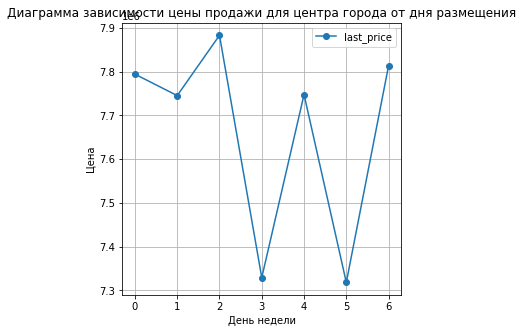

In [93]:
# Зависимость для центра города от дня размещения
(
    data_piter_center.pivot_table(index='weekday', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Диаграмма зависимости цены продажи для центра города от дня размещения') # заголовок диаграммы
plt.ylabel('Цена') # y-метка
plt.xlabel('День недели') # x-метка

Для центра Санкт-Петербурга построим графики рассеяния.  Выделим параметры цена продажи, стоимость квадратного метра, площадь квартиры, количество комнат в отдельную таблицу.

In [94]:
data_flat_matrix = data_piter_center.loc[:, ['last_price', 'price_for_meter', 'total_area', 'rooms', 'ceiling_height','km_to_cityCenters' ]]

Посмотрим рассеяние

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='price_for_meter', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='ceiling_height', ylabel='last_price'>,
        <AxesSubplot:xlabel='km_to_cityCenters', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='price_for_meter'>,
        <AxesSubplot:xlabel='price_for_meter', ylabel='price_for_meter'>,
        <AxesSubplot:xlabel='total_area', ylabel='price_for_meter'>,
        <AxesSubplot:xlabel='rooms', ylabel='price_for_meter'>,
        <AxesSubplot:xlabel='ceiling_height', ylabel='price_for_meter'>,
        <AxesSubplot:xlabel='km_to_cityCenters', ylabel='price_for_meter'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='price_for_meter', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', yla

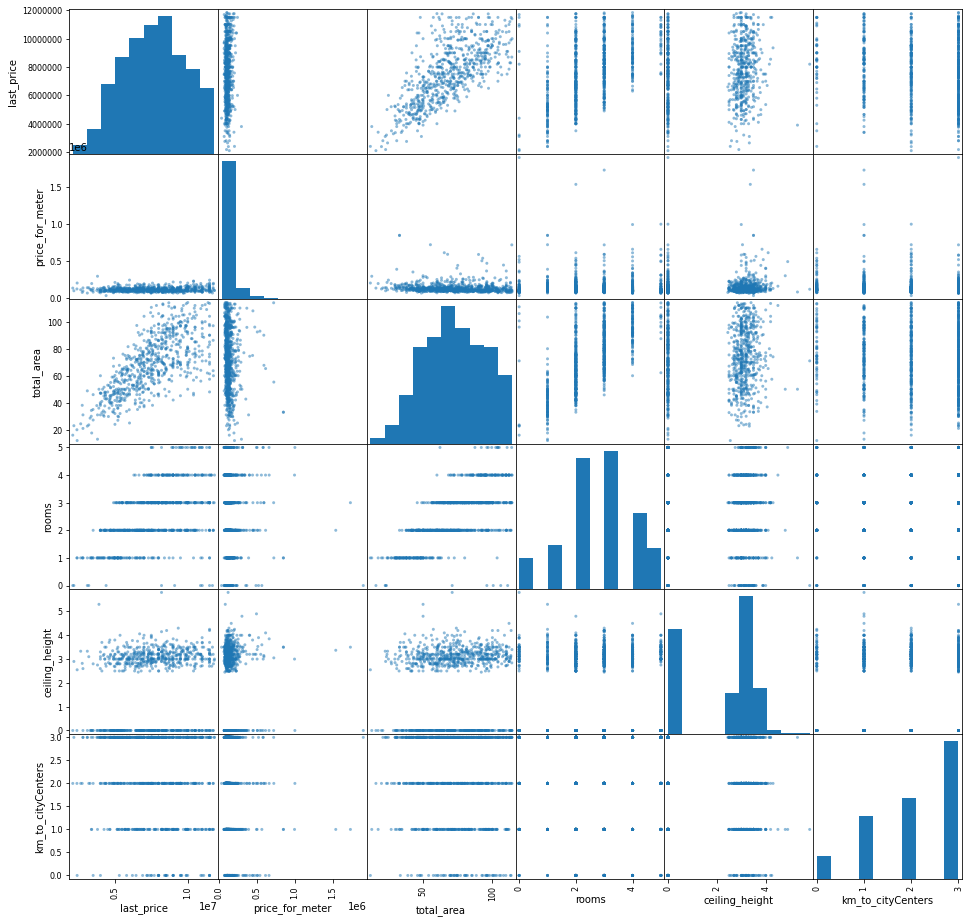

In [95]:
pd.plotting.scatter_matrix(data_flat_matrix, figsize=(16, 16))

Медианная стоимость квадратного метра в центре Санкт-Петербурга примерно на 11.5 тыс.руб. выше, чем средняя по городу (116 150 рублей против 104 687 рублей.
Средняя стоимость квартиры в центре Санкт-Петербурга примерно на 2.3 млн.руб. выше, чем средняя по городу.
Общая площадь реализуемой квартиры в центре Санкт-Петербурга примено на 20 кв. метров. больше, чем средняя по городу (72 кв. м. против 52 кв. м).  
В центре в среднем 3-х комнатные квартиры против 2-х комнатных в среднем по городу.  
Высота потолков немного выше (18 см).   
Соотношение квартир на разных этажах примерно одинаковое.   
Соотношения объявлений по дням недели, месяцам и годам примерно одинаковое, тенденции похожи.   
Графики рассеивания схожи для квартир по всему городу и в центре.

## Общий вывод

Был представлен датасет с информацией о продаже квартир. В ходе аналитического исследования была проведена следующая работа.  
- заполнены пропуски в данных: высота потолков (по среднему значению), жилая площадь (в зависимости от количества комнат), площадь кухни (по среднему отношению к площади квартиры);  
- заменен тип object у количества дней размещений, названия населенного пункта и апартаментах для удобства дальнейшей работы;   
- добавлены новые столбцы с ценой квадратного метра, категоризацией этажа квартиры, днем недели, месяцем, годом публикаци объявления и соотношением жилой площади и кухни к общей площади квартиры.   
По результатам исследования по всей выборке до среза выбивающихся значений были сделаны выводы о том, что:  
- наиболее часто встречаются 1 и 2-х комнатные квартиры;  
- наиболее частые размеры площади 35-45 кв. метров;  
- имеется пик стоимости в районе 4 миллионов рублей;  
- наиболее часто встречающаяся высота потолков 2.45-3 метра;  
- больше всего квартир было продано через 1.5 месяца после выставления объявления;    
Затем были отрезаны выбивающиеся значения, например, высота потолков меньше 2 метров, площадь кухни меньше 8 метров и т д. 
Исследование диаграмм рассеивание показало:
- прямую зависимость между ценой продажи и размером квартиры;
- то что разброс цены увеличивается при увеличении числа комнат;
- то, что зависимости цены квартиры от расстояния до центра не такая явная, как для площади квартиры, но для квартир в самом центре города разброс цены в большую сторону значительно выше;
- то, что явной зависимотси между ценой продажи и днем недели выставления объявления нет;
- то, что зависимости от месяца так же нет, хотя разброс цен в апреле и мае несколько выше.
В 2015 и 2016 году цена продажи была в среднем ниже, чем в 2017 году. В 2017 году разброс цен выше. При этом нельзя утверждать, что со временем цена квартир увеличивается.   
Цены квартир на 1-ом этаже ниже, чем на других. Среди городов с наибольшим числом объявлений , самые дорогие цены за квадратный метр квартиры в: Санкт-Петербурге, Пушкине и Сестрорецке, а самые низкие цены в: Красном Селе, Ломоносове и Кронштаде.  
Цена за квадратный метр квартиры в Питере начинает падать примерно 6 км от центра, резко падать примерно 10 км от центра, таким образом эту зону можно принять за центр города. При этом на 27  км от центра имеется скачок цен.  
Средняя стоимость квартиры в центре Питера примерно на 2.3 млн.руб. выше, чем средняя по городу. Выше и общая площадь квартиры на 13 кв. метров. Цена одного квадратого метро отличается примерно на 11 тыс. руб. В центре города в среднем 3-х комнатные квартиры против 2-х комнатных в среднем по городу.   
Высота потолков существенно выше (на 42 см).   
Соотношение квартир на разных этажах примерно одинаковое. Соотношения объявлений по дням недели, месяцам и годам примерно одинаковое, тенденции похожи.   
Графики рассеивания схожи для квартир по всему городу и в центре.

Агрегированные показатели по Санкт-Петербургу (медианы соответствующих значений)  

In [99]:
data_flat_piter

,last_price,price_for_meter,total_area,rooms,ceiling_height,km_to_cityCenters
locality_name,,,,,,
Санкт-Петербург,5150000.0,104687.5,52.0,2,1.776358,11.103895


Агрегированные показатели по Центру Санкт-Петербурга (медианы соответствующих значений)  

In [97]:
data_flat_piter_center

,last_price,price_for_meter,total_area,rooms,ceiling_height,km_to_cityCenters
locality_name,,,,,,
Санкт-Петербург,7600000.0,116150.0,72.0,3,2.191305,2.098361


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [x]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [x]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года». 
- [x]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [x]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [x]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод